In [1]:
import pandas as pd
import numpy as np
import re
import datetime
from datetime import timedelta
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/content/drive/MyDrive/Aviator/Data1/bd_pseudo_1.csv'
data = pd.read_csv(path)
print(data)
t = 0
print(len(data))
t0 = int(input("Maximo: "))
tamanho_data = len(data)

odd = []
horario = []
odd_ajustada = []

while t <= t0:
    if t < tamanho_data:
        value = data['odd'][t]
        if isinstance(value, float):
            odd.append(np.nan)  # or any other value to represent missing data
        else:
            aux = value.split('\n\n')
            a1 = aux[0].replace(')I', '')
            a2 = a1.replace(')', '')
            a3 = a2.replace('|', '1')
            a4 = a3.replace('?', '7')
            a5 = re.sub('[^0-9.]', '', a4)
            odd.append(float(a5))
        horario.append(data['hora_criacao'][t])

    t += 1

for name in odd:
    ajuste = float(name - 1.25)
    odd_ajustada.append(ajuste)

horas = []
minutos = []
segundos = []
for item in horario:
    dt = datetime.datetime.strptime(item, "%a %b %d %H:%M:%S %Y")
    horas.append(dt.hour)
    minutos.append(dt.minute)
    segundos.append(dt.second)

data1 = pd.DataFrame({'Odd_ajustada': odd, 'hora': horas, 'minutos': minutos, 'segundos': segundos, 'horario': horario})

data2 = pd.DataFrame({'horario': horario, 'Odd_ajustada': odd})

tempo = []
for i in range(2, len(data2)):
    #print(data2['horario'][i])
    name = pd.to_datetime(data2['horario'][i - 1]) - pd.to_datetime(data2['horario'][i - 2])
    tempo.append(name)

# Convertendo para segundos
tempo_em_segundos = [t.total_seconds() for t in tempo]
time = np.ones(len(data), dtype = int)
for i in range(0, len(time)):
    if i == 0 or i == 1:
	    time[i] = 12
    else:
    	time[i] = tempo_em_segundos[i - 2]

tempo_em_segundos = time
# Adicionando a coluna de tempo em segundos ao DataFrame
data1['tempo_em_segundos'] = tempo_em_segundos

dados_filtrados = data2[data2['Odd_ajustada'] < 20]

###Data final
#data = dados_filtrados
data = data1
data2 = data1

# Verificar se existem valores NaN na coluna "Odd_ajustada"
has_nan = data['Odd_ajustada'].isna().any()
if has_nan:
    print("Existem valores NaN na coluna 'Odd_ajustada'.")
else:
    print("Não existem valores NaN na coluna 'Odd_ajustada'.")


          id    odd              hora_criacao apostadores
0          0  13.89  Sat May 27 00:28:06 2023        1650
1          1   1.44  Sat May 27 00:28:18 2023       22211
2          2   3.39  Sat May 27 00:28:42 2023        1751
3          3   1.27  Sat May 27 00:28:56 2023        1950
4          4   5.16  Sat May 27 00:29:26 2023        2086
...      ...    ...                       ...         ...
37352  37355   1.64  Fri Oct 20 18:47:42 2023       9050
37353  37356   1.25  Fri Oct 20 18:48:02 2023          3
37354  37357   1.02  Fri Oct 20 18:48:15 2023           
37355  37358   4.92  Fri Oct 20 18:48:50 2023           
37356  37359   1.18  Fri Oct 20 18:49:08 2023          0

[37357 rows x 4 columns]
37357
Maximo: 37357
Não existem valores NaN na coluna 'Odd_ajustada'.


In [ ]:
geral_cat = []
for name in data['Odd_ajustada']:
  #print(name)
  if name < 1.05:
    geral_cat.append(1)
  elif name >= 1.05 and name < 1.15:
    geral_cat.append(2)
  elif name >= 1.15 and name < 1.3:
    geral_cat.append(3)
  elif name >= 1.3 and name < 1.45:
    geral_cat.append(4)
  elif name >= 1.45 and name < 1.7:
    geral_cat.append(5)
  elif name >= 1.7 and name < 2.1:
    geral_cat.append(6)
  elif name >= 2.1 and name < 2.6:
    geral_cat.append(7)
  elif name >= 2.6 and name < 3.5:
    geral_cat.append(8)
  elif name >= 3.5 and name < 5:
    geral_cat.append(9)
  elif name >= 5 and name < 10:
    geral_cat.append(10)
  elif name >= 10:
    geral_cat.append(11)
print(len(geral_cat))
geral_cat1 = pd.DataFrame([geral_cat]).T
geral_cat1.columns = ['Odd_Categoria']
data = pd.concat([data, geral_cat1], axis = 1)

data['Odd_Categoria'].describe()

33477


count    33477.000000
mean         6.114407
std          3.098311
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         11.000000
Name: Odd_Categoria, dtype: float64

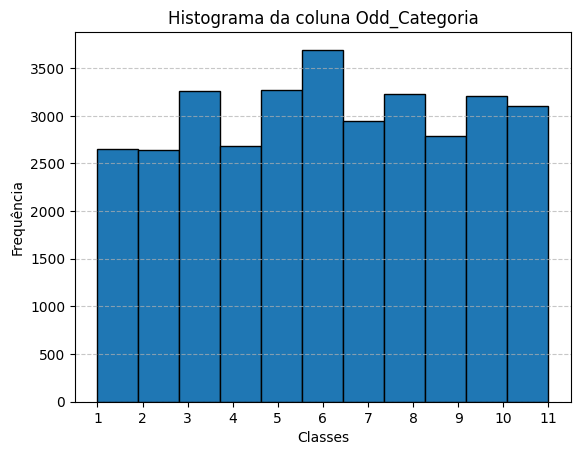

In [ ]:
# Configurar o histograma
plt.hist(data['Odd_Categoria'], bins=11, edgecolor='k')  # O número de bins deve corresponder ao número de classes (12 no seu caso)
plt.title('Histograma da coluna Odd_Categoria')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 12))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


In [ ]:

part = []
print(len(data))
for k in range(1, len(data)):
    #print(k, data['hora'][k], type(data['hora'][k]))
    if data['hora'][k] >= 6 and data['hora'][k] <  12:
        part.append(1)
    elif data['hora'][k] >= 12 and data['hora'][k] < 18:
        part.append(2)
    elif 18 <= data['hora'][k] < 24:
        part.append(3)
    else:
        part.append(4)
part1 = np.ones(len(data), dtype = int)
for i in range(0, len(data)):
    if i == 0:
        part1[i] = part[i]
    else:
        part1[i] = part[i - 1]

data['parte_do_dia'] = part1

print(len(part1))
print(part1)

# Atualize a coluna 'hora' após a remoção de linhas
data['hora'] = data['horario'].apply(lambda x: datetime.datetime.strptime(x, "%a %b %d %H:%M:%S %Y").hour)

data['odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5).mean()
data['odd_categoria_media_movel10'] = data['Odd_Categoria'].rolling(window=10).mean()
data['odd_categoria_media_movel20'] = data['Odd_Categoria'].rolling(window=20).mean()
data['odd_categoria_media_movel40'] = data['Odd_Categoria'].rolling(window=40).mean()
data['odd_categoria_media_movel80'] = data['Odd_Categoria'].rolling(window=80).mean()
data['odd_categoria_media_movel160'] = data['Odd_Categoria'].rolling(window=160).mean()
data['odd_categoria_media_movel320'] = data['Odd_Categoria'].rolling(window=320).mean()
data['odd_categoria_media_movel640'] = data['Odd_Categoria'].rolling(window=640).mean()

data = data.fillna(data.mean())  # Preencher com a média da coluna

# Estatísticas Descritivas
data['odd_mediana5'] = data['Odd_Categoria'].rolling(window=5).median()
data['odd_mediana10'] = data['Odd_Categoria'].rolling(window=10).median()
data['odd_mediana20'] = data['Odd_Categoria'].rolling(window=20).median()
data['odd_mediana40'] = data['Odd_Categoria'].rolling(window=40).median()
data['odd_mediana80'] = data['Odd_Categoria'].rolling(window=80).median()
data['odd_mediana160'] = data['Odd_Categoria'].rolling(window=160).median()
data['odd_mediana320'] = data['Odd_Categoria'].rolling(window=320).median()
data['odd_mediana640'] = data['Odd_Categoria'].rolling(window=640).median()

data['odd_desvio_padrao5'] = data['Odd_Categoria'].rolling(window=5).std()
data['odd_desvio_padrao10'] = data['Odd_Categoria'].rolling(window=10).std()
data['odd_desvio_padrao20'] = data['Odd_Categoria'].rolling(window=20).std()
data['odd_desvio_padrao40'] = data['Odd_Categoria'].rolling(window=40).std()
data['odd_desvio_padrao80'] = data['Odd_Categoria'].rolling(window=80).std()
data['odd_desvio_padrao160'] = data['Odd_Categoria'].rolling(window=160).std()
data['odd_desvio_padrao320'] = data['Odd_Categoria'].rolling(window=320).std()
data['odd_desvio_padrao640'] = data['Odd_Categoria'].rolling(window=640).std()

data['odd_min5'] = data['Odd_Categoria'].rolling(window=5).min()
data['odd_min10'] = data['Odd_Categoria'].rolling(window=10).min()
data['odd_min20'] = data['Odd_Categoria'].rolling(window=20).min()
data['odd_min40'] = data['Odd_Categoria'].rolling(window=40).min()
data['odd_min80'] = data['Odd_Categoria'].rolling(window=80).min()

data['odd_max5'] = data['Odd_Categoria'].rolling(window=5).max()
data['odd_max10'] = data['Odd_Categoria'].rolling(window=10).max()
data['odd_max20'] = data['Odd_Categoria'].rolling(window=20).max()
data['odd_max40'] = data['Odd_Categoria'].rolling(window=40).max()
data['odd_max80'] = data['Odd_Categoria'].rolling(window=80).max()

# Tendência das Odds
data['odd_tendencia'] = data['Odd_Categoria'].diff()

# Tendência de Média Móvel
data['tendencia_media_movel5'] = data['odd_categoria_media_movel5'].diff()
data['tendencia_media_movel10'] = data['odd_categoria_media_movel10'].diff()
data['tendencia_media_movel20'] = data['odd_categoria_media_movel20'].diff()
data['tendencia_media_movel40'] = data['odd_categoria_media_movel40'].diff()
data['tendencia_media_movel80'] = data['odd_categoria_media_movel80'].diff()
data['tendencia_media_movel160'] = data['odd_categoria_media_movel160'].diff()
data['tendencia_media_movel320'] = data['odd_categoria_media_movel320'].diff()
data['tendencia_media_movel640'] = data['odd_categoria_media_movel640'].diff()

# Contagem de repetições das categorias
data['categoria_contagem'] = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts())

# Remova linhas com valores ausentes resultantes das operações de janelas
data = data.fillna(data.mean())

# Verifique se há valores nulos em cada coluna
valores_ausentes = data.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

data.head(20)
data.shape

33477
33477
[4 4 4 ... 4 4 4]


<ipython-input-96-8530d15aea43>:37: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())  # Preencher com a média da coluna


Series([], dtype: int64)


<ipython-input-96-8530d15aea43>:87: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


(33477, 52)

<ipython-input-97-516b264cc2dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


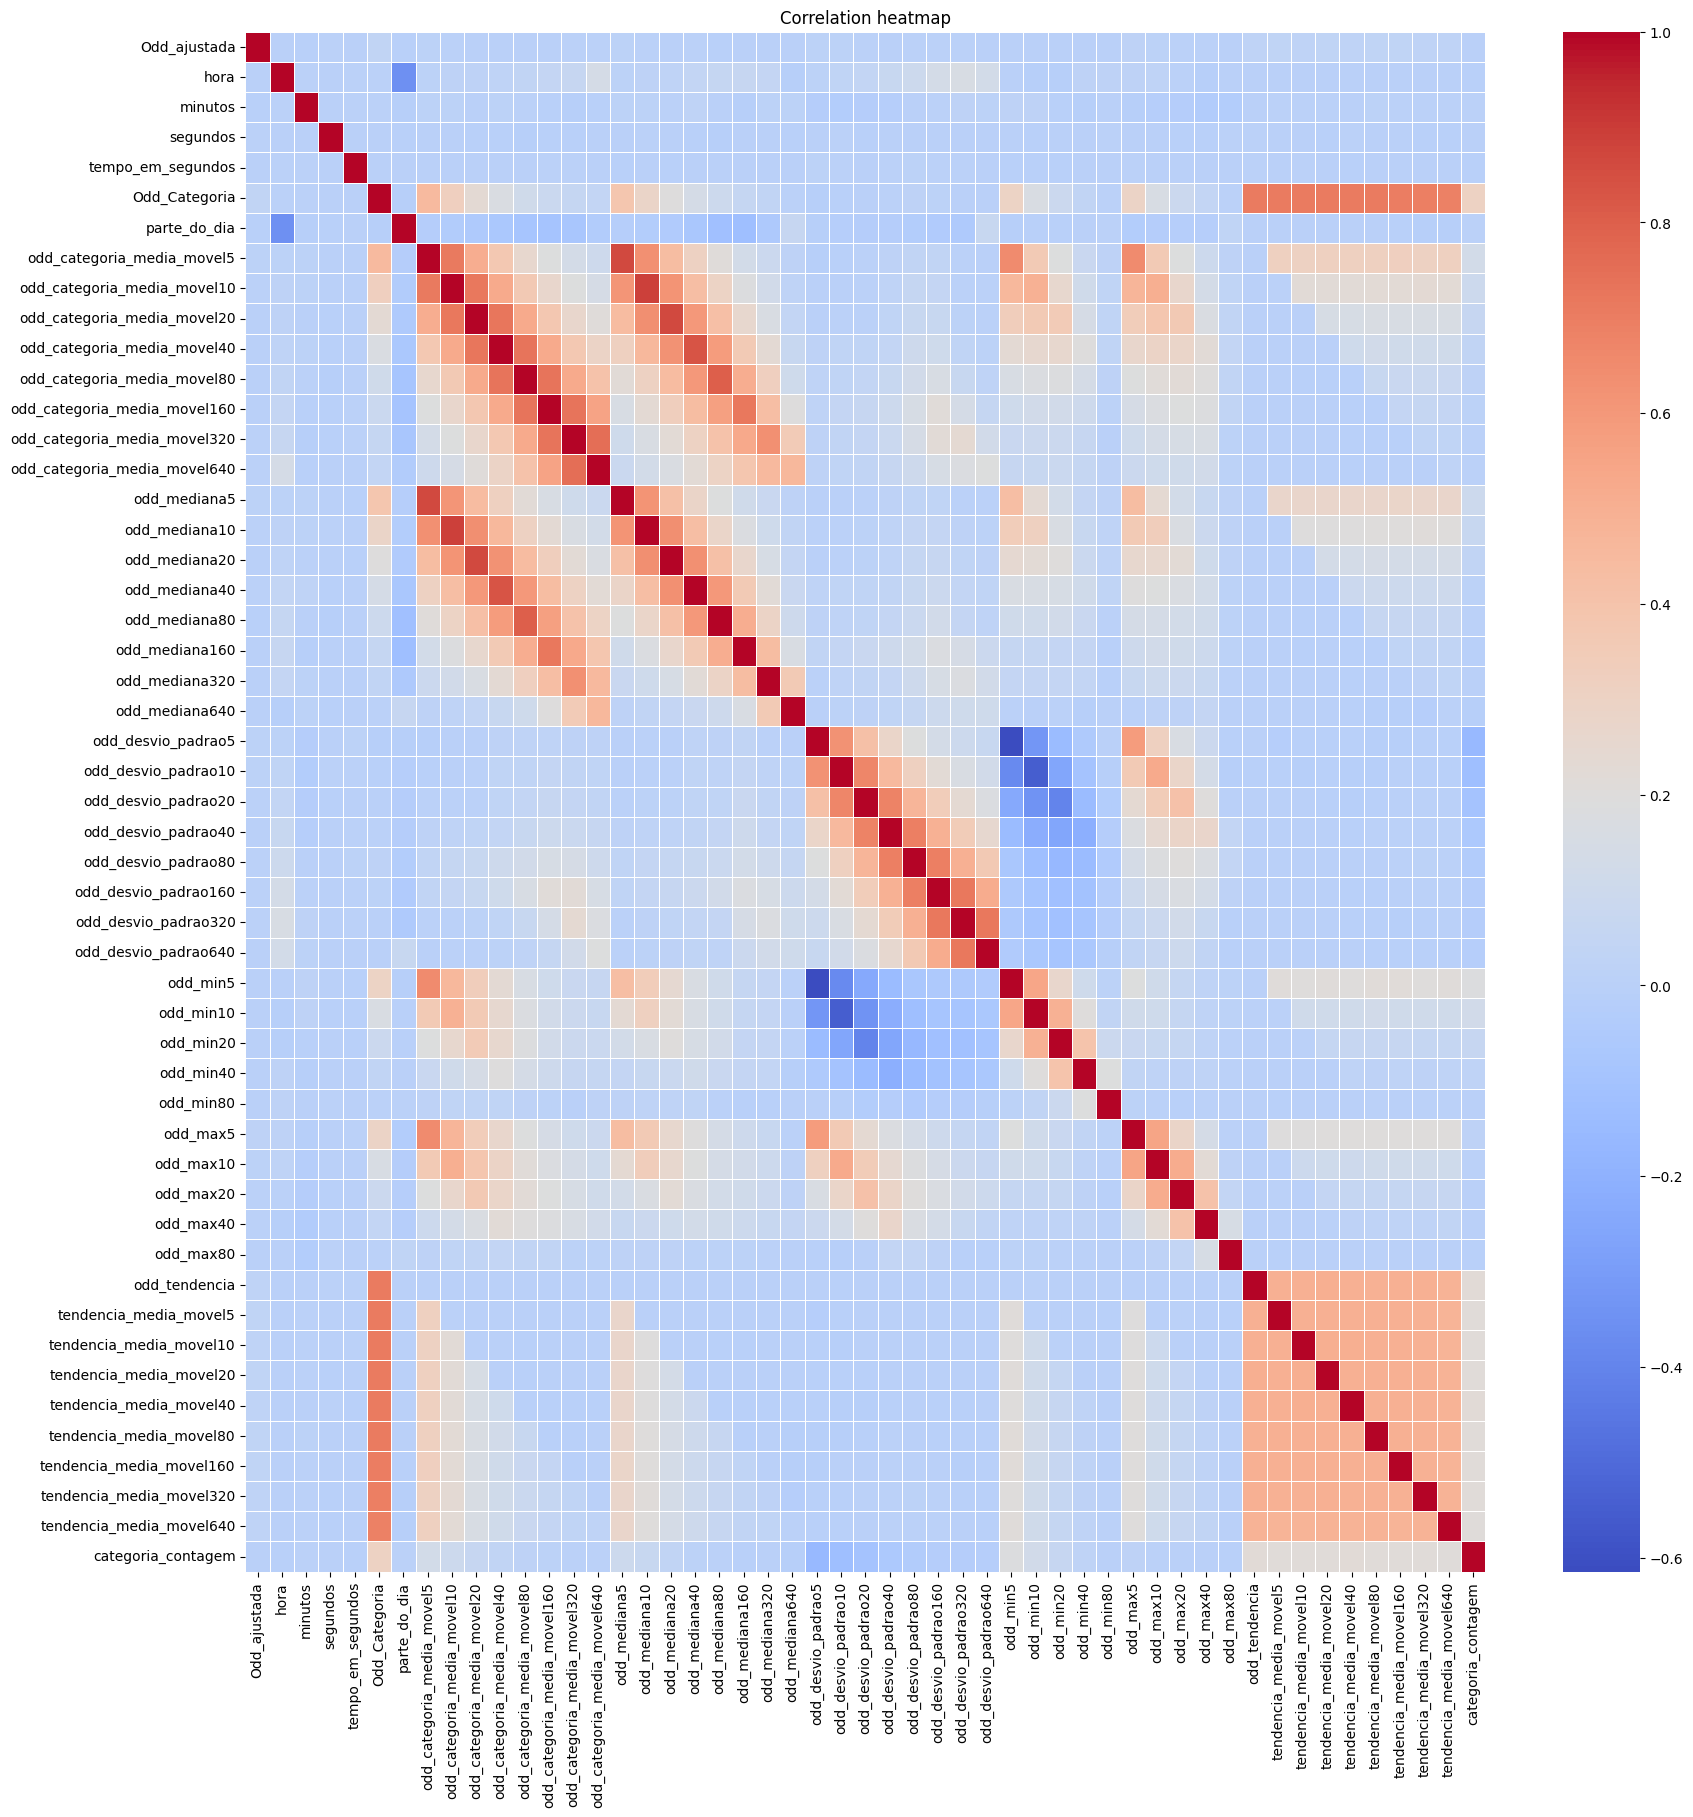

In [ ]:
# Calculando a matriz de correlação
corr_matrix = data.corr()

# Criando o heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=.5)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
data.columns

Index(['Odd_ajustada', 'hora', 'minutos', 'segundos', 'horario',
       'tempo_em_segundos', 'Odd_Categoria', 'parte_do_dia',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
       'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
       'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
       'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
       'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_min80', 'odd_max5', 'odd_max10',
       'odd_max20', 'odd_max40', 'odd_max80', 'odd_tendencia',
       'tendencia_media_movel5', 'tendencia_media_movel10',
       'tendencia_

In [ ]:
# Separar recursos (X) e rótulos (y)
X = data[['parte_do_dia','odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
       'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
       'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
       'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
       'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_min80', 'odd_max5', 'odd_max10', 'odd_max20', 'odd_max40',
       'odd_max80', 'odd_tendencia',
       'tendencia_media_movel5', 'tendencia_media_movel10',
       'tendencia_media_movel20', 'tendencia_media_movel40',
       'tendencia_media_movel80', 'tendencia_media_movel160',
       'tendencia_media_movel320', 'tendencia_media_movel640',
       'categoria_contagem']].values
y = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo LSTM com camadas adicionais e dropout
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))  # Camada LSTM com retorno de sequência
model.add(Dropout(0.2))  # Camada de dropout para redução de overfitting
model.add(LSTM(64))  # Segunda camada LSTM
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Camada densa com regularização L2
model.add(Dense(12, activation='softmax'))  # Camada de saída com ativação softmax para 11 categorias

# Compilar o modelo com uma taxa de aprendizado menor
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Treinar o modelo
model_train = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=50, batch_size=32, validation_split=0.2)
#model_train

# Avaliar o modelo no conjunto de teste
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[1]
print(f'Acurácia do modelo: {accuracy}')

# Fazer previsões
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

# Arredondar as previsões para obter rótulos de classe
predicted_labels = np.argmax(predictions, axis=1)

# Calcular o F1-Score
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f'F1-Score do modelo: {f1}')

Epoch 1/50
670/670 [==============================] - 98s 128ms/step - loss: 1.0151 - accuracy: 0.6131 - val_loss: 0.4874 - val_accuracy: 0.8307
Epoch 2/50
670/670 [==============================] - 80s 120ms/step - loss: 0.4463 - accuracy: 0.8373 - val_loss: 0.3551 - val_accuracy: 0.8764
Epoch 3/50
670/670 [==============================] - 79s 118ms/step - loss: 0.3673 - accuracy: 0.8673 - val_loss: 0.3124 - val_accuracy: 0.8865
Epoch 4/50
670/670 [==============================] - 70s 104ms/step - loss: 0.3088 - accuracy: 0.8919 - val_loss: 0.2682 - val_accuracy: 0.9059
Epoch 5/50
670/670 [==============================] - 50s 75ms/step - loss: 0.2757 - accuracy: 0.9027 - val_loss: 0.2495 - val_accuracy: 0.9123
Epoch 6/50
670/670 [==============================] - 49s 74ms/step - loss: 0.2511 - accuracy: 0.9112 - val_loss: 0.2294 - val_accuracy: 0.9149
Epoch 7/50
670/670 [==============================] - 50s 75ms/step - loss: 0.2286 - accuracy: 0.9194 - val_loss: 0.2091 - val_accur

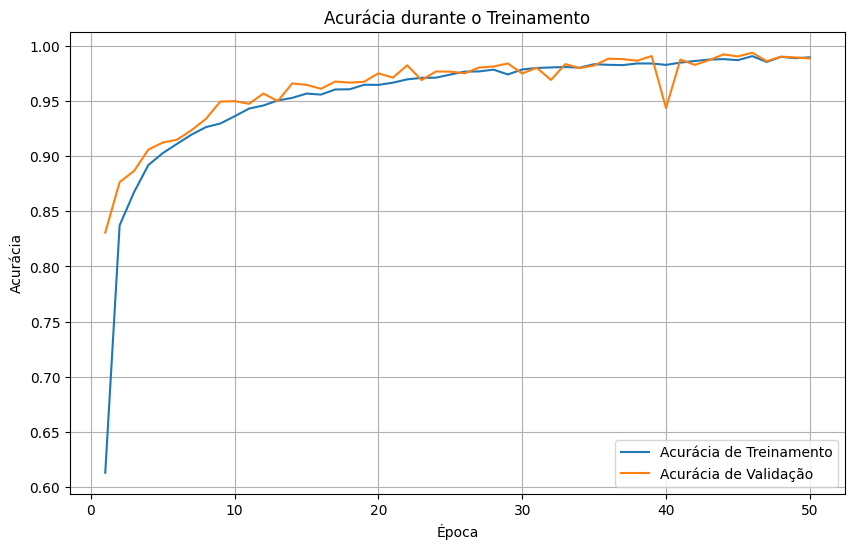

In [ ]:
# Extrair as métricas de treinamento
train_acc = model_train.history['accuracy']
val_acc = model_train.history['val_accuracy']

# Criar um gráfico da acurácia durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_acc, label='Acurácia de Treinamento')
plt.plot(range(1, 51), val_acc, label='Acurácia de Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data_predict1 = pd.DataFrame()
data_predict1['teste'] = y_test
data_predict1['predicao'] = predicted_labels
data_predict1

,teste,predicao
0,1,1
1,4,4
2,3,3
3,2,2
4,3,3
...,...,...
6691,11,11
6692,10,10
6693,1,1
6694,6,6


In [ ]:
data2.columns

Index(['Odd_ajustada', 'hora', 'minutos', 'segundos', 'horario',
       'tempo_em_segundos'],
      dtype='object')

In [ ]:
data2['tempo_em_segundos'].describe()

count    3.347700e+04
mean     3.592522e+02
std      3.033049e+04
min      3.000000e+00
25%      1.500000e+01
50%      2.000000e+01
75%      2.800000e+01
max      5.029948e+06
Name: tempo_em_segundos, dtype: float64

In [ ]:
data1 = data
data = data2

In [ ]:
data3 = data2

In [ ]:
data.columns

Index(['Odd_ajustada', 'hora', 'minutos', 'segundos', 'horario',
       'tempo_em_segundos'],
      dtype='object')

In [ ]:
array_categoriat = []
for name in data['tempo_em_segundos']:
  if name < 12:
    array_categoriat.append(1)
  elif name >= 12 and name < 13.5:
    array_categoriat.append(2)
  elif name >= 13.5 and name < 15:
    array_categoriat.append(3)
  elif name >= 15 and name < 16.5:
    array_categoriat.append(4)
  elif name >= 16.5 and name < 19:
    array_categoriat.append(5)
  elif name >= 19 and name < 21:
    array_categoriat.append(6)
  elif name >= 21 and name < 24:
    array_categoriat.append(7)
  elif name >= 24 and name < 27:
    array_categoriat.append(8)
  elif name >= 27 and name < 32:
    array_categoriat.append(9)
  elif name >= 32 and name < 40:
    array_categoriat.append(10)
  elif name >= 40:
    array_categoriat.append(11)

array_categoriat = pd.DataFrame(array_categoriat)
print(len(array_categoriat))
array_categoriat.columns = ['tempo_segundos_categoria']
#array_categoriat.head()
data = pd.concat([data, array_categoriat], axis = 1)

data['tempo_segundos_categoria'].describe()


33477


count    33477.000000
mean         6.138513
std          3.101899
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         11.000000
Name: tempo_segundos_categoria, dtype: float64

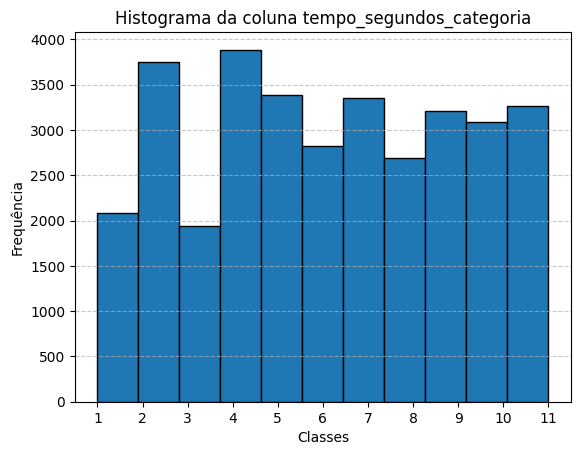

In [ ]:
# Configurar o histograma
plt.hist(data['tempo_segundos_categoria'], bins=11, edgecolor='k')  # O número de bins deve corresponder ao número de classes (12 no seu caso)
plt.title('Histograma da coluna tempo_segundos_categoria')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 12))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


In [ ]:
data['media_movel_segundo5c'] = data['tempo_segundos_categoria'].rolling(window=5).mean()
data['media_movel_segundo10c'] = data['tempo_segundos_categoria'].rolling(window=10).mean()
data['media_movel_segundo20c'] = data['tempo_segundos_categoria'].rolling(window=20).mean()
data['media_movel_segundo40c'] = data['tempo_segundos_categoria'].rolling(window=40).mean()
data['media_movel_segundo80c'] = data['tempo_segundos_categoria'].rolling(window=80).mean()
data['media_movel_segundo160c'] = data['tempo_segundos_categoria'].rolling(window=160).mean()
data['media_movel_segundo320c'] = data['tempo_segundos_categoria'].rolling(window=320).mean()
data['media_movel_segundo640c'] = data['tempo_segundos_categoria'].rolling(window=640).mean()

data = data.fillna(data.mean())  # Preencher com a média da coluna

# Estatísticas Descritivas
#tsc - tempo segundos categoria
data['tsc_mediana5'] = data['tempo_segundos_categoria'].rolling(window=5).median()
data['tsc_mediana10'] = data['tempo_segundos_categoria'].rolling(window=10).median()
data['tsc_mediana20'] = data['tempo_segundos_categoria'].rolling(window=20).median()
data['tsc_mediana40'] = data['tempo_segundos_categoria'].rolling(window=40).median()
data['tsc_mediana80'] = data['tempo_segundos_categoria'].rolling(window=80).median()
data['tsc_mediana160'] = data['tempo_segundos_categoria'].rolling(window=160).median()
data['tsc_mediana320'] = data['tempo_segundos_categoria'].rolling(window=320).median()
data['tsc_mediana640'] = data['tempo_segundos_categoria'].rolling(window=640).median()

data['tsc_desvio_padrao5'] = data['tempo_segundos_categoria'].rolling(window=5).std()
data['tsc_desvio_padrao10'] = data['tempo_segundos_categoria'].rolling(window=10).std()
data['tsc_desvio_padrao20'] = data['tempo_segundos_categoria'].rolling(window=20).std()
data['tsc_desvio_padrao40'] = data['tempo_segundos_categoria'].rolling(window=40).std()
data['tsc_desvio_padrao80'] = data['tempo_segundos_categoria'].rolling(window=80).std()
data['tsc_desvio_padrao160'] = data['tempo_segundos_categoria'].rolling(window=160).std()
data['tsc_desvio_padrao320'] = data['tempo_segundos_categoria'].rolling(window=320).std()
data['tsc_desvio_padrao640'] = data['tempo_segundos_categoria'].rolling(window=640).std()

data['tsc_min5'] = data['tempo_segundos_categoria'].rolling(window=5).min()
data['tsc_min10'] = data['tempo_segundos_categoria'].rolling(window=10).min()
data['tsc_min20'] = data['tempo_segundos_categoria'].rolling(window=20).min()
data['tsc_min40'] = data['tempo_segundos_categoria'].rolling(window=40).min()
data['tsc_min80'] = data['tempo_segundos_categoria'].rolling(window=80).min()
data['tsc_min160'] = data['tempo_segundos_categoria'].rolling(window=160).min()
data['tsc_min320'] = data['tempo_segundos_categoria'].rolling(window=320).min()

data['tsc_max5'] = data['tempo_segundos_categoria'].rolling(window=5).max()
data['tsc_max10'] = data['tempo_segundos_categoria'].rolling(window=10).max()
data['tsc_max20'] = data['tempo_segundos_categoria'].rolling(window=20).max()
data['tsc_max40'] = data['tempo_segundos_categoria'].rolling(window=40).max()
data['tsc_max80'] = data['tempo_segundos_categoria'].rolling(window=80).max()

# Tendência das Odds
data['tsc_tendencia'] = data['tempo_segundos_categoria'].diff()

# Tendência de Média Móvel
data['tendencia_media_movel_tsc5'] = data['media_movel_segundo5c'].diff()
data['tendencia_media_movel_tsc10'] = data['media_movel_segundo10c'].diff()
data['tendencia_media_movel_tsc20'] = data['media_movel_segundo20c'].diff()
data['tendencia_media_movel_tsc40'] = data['media_movel_segundo40c'].diff()
data['tendencia_media_movel_tsc80'] = data['media_movel_segundo80c'].diff()
data['tendencia_media_movel_tsc160'] = data['media_movel_segundo160c'].diff()
data['tendencia_media_movel_tsc320'] = data['media_movel_segundo320c'].diff()
data['tendencia_media_movel_tsc640'] = data['media_movel_segundo640c'].diff()

# Contagem de repetições das categorias
data['categoria_contagem_tsc'] = data['tempo_segundos_categoria'].map(data['tempo_segundos_categoria'].value_counts())

# Remova linhas com valores ausentes resultantes das operações de janelas
data = data.fillna(data.mean())

# Verifique se há valores nulos em cada coluna
valores_ausentes = data.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

data.head(20)
data.shape

<ipython-input-109-1cd32efc97c3>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())  # Preencher com a média da coluna
<ipython-input-109-1cd32efc97c3>:63: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Series([], dtype: int64)


(33477, 53)

<ipython-input-110-516b264cc2dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


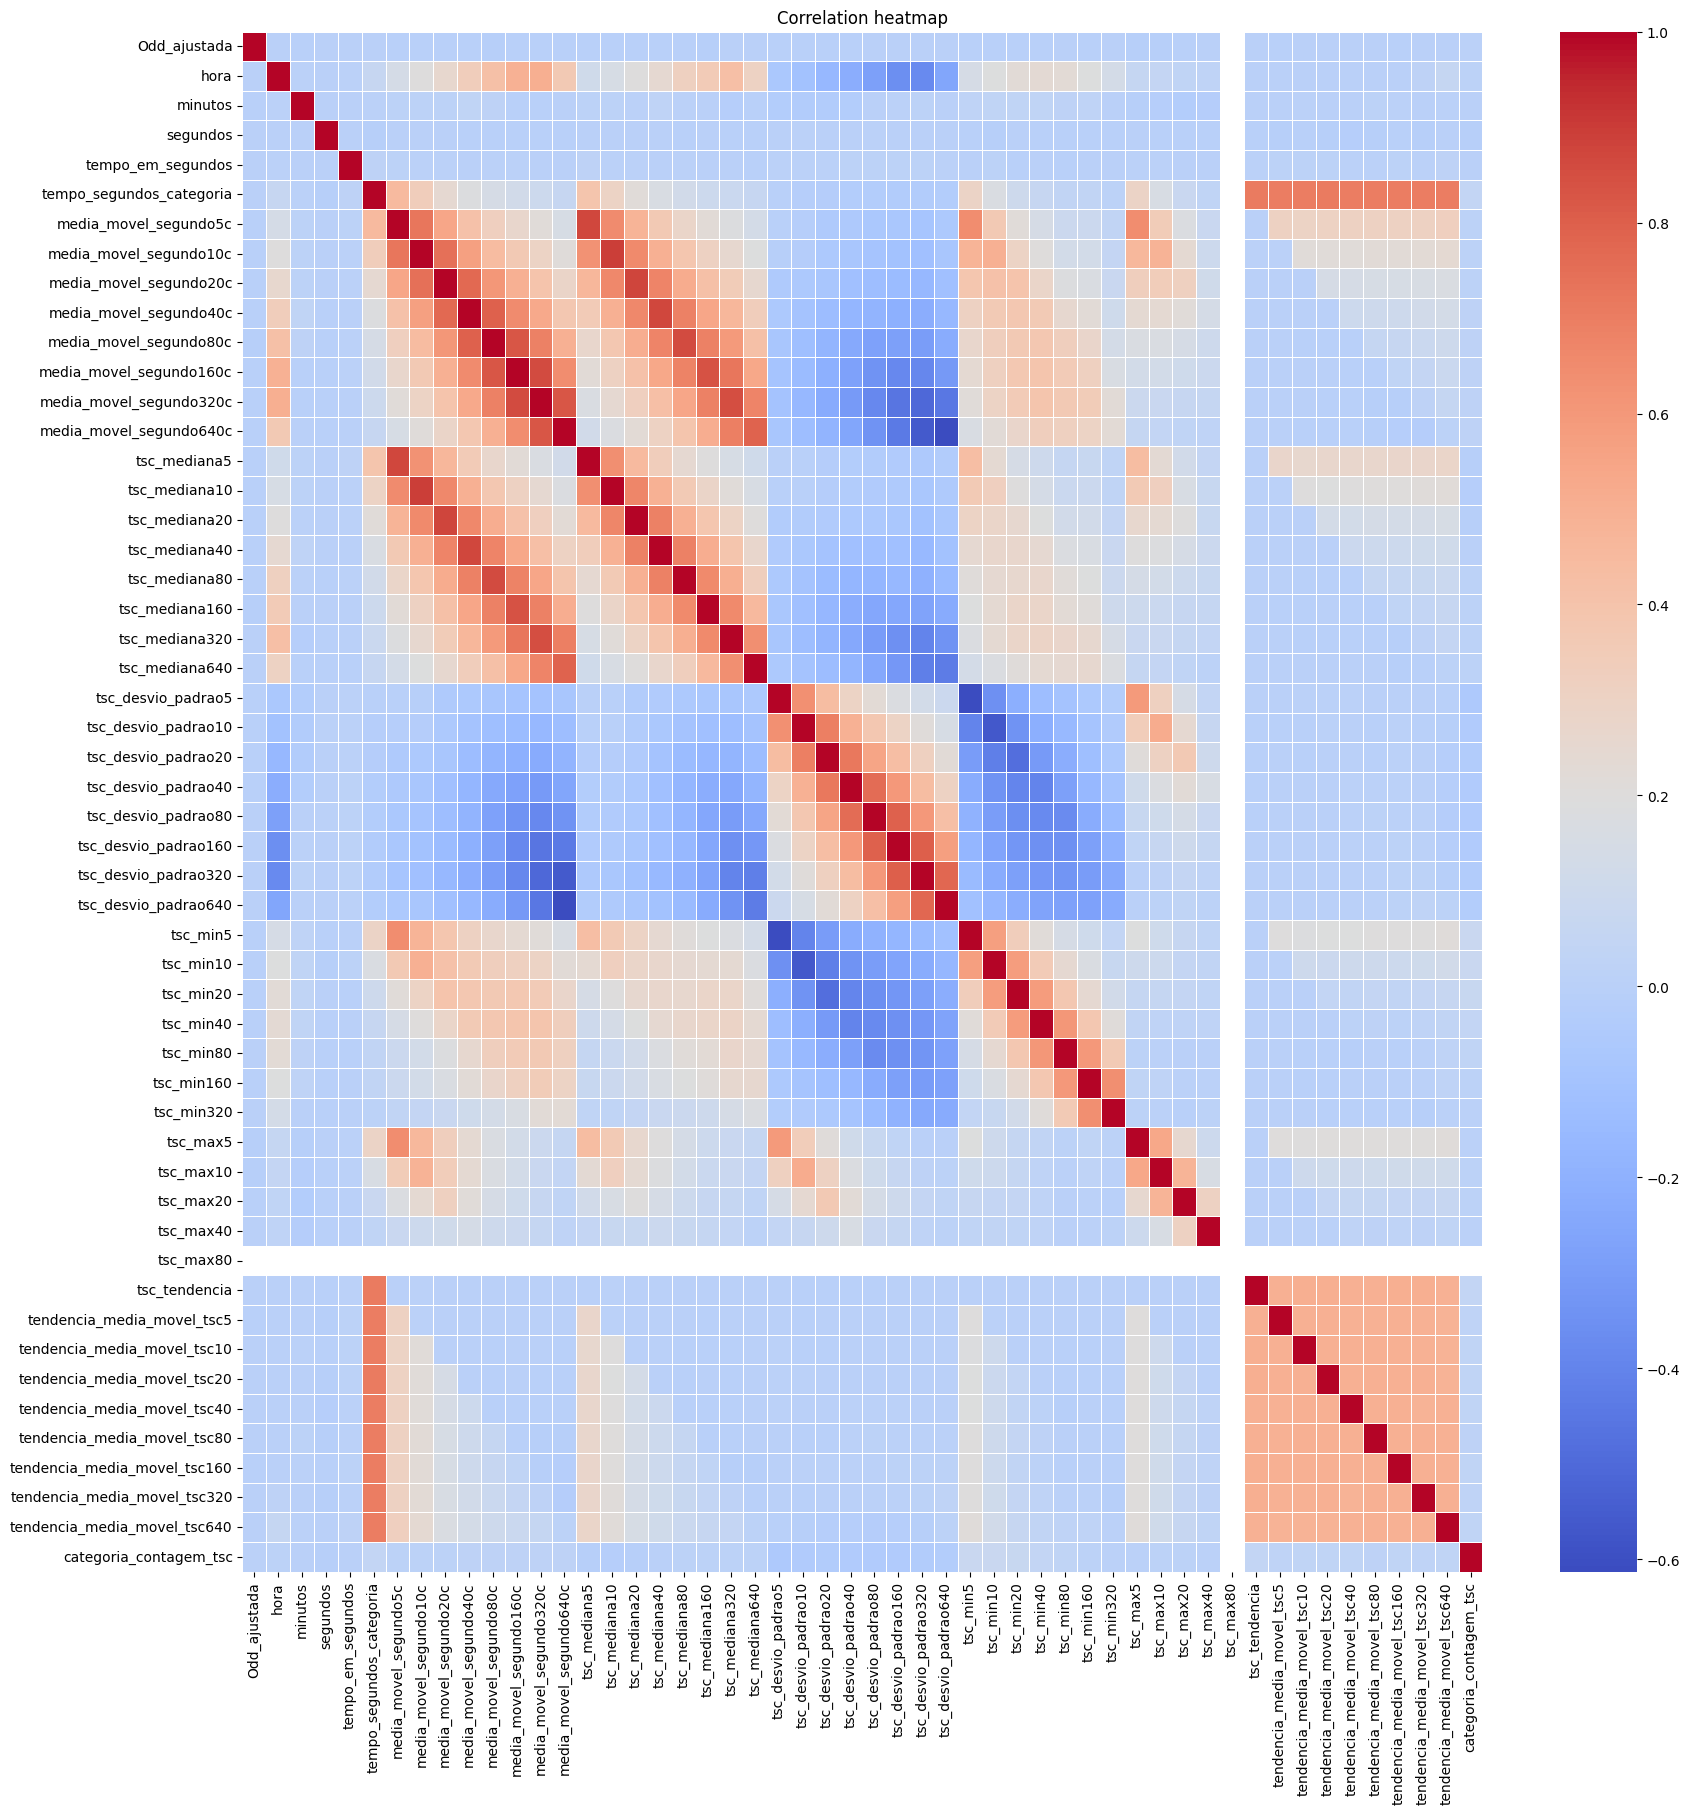

In [ ]:
# Calculando a matriz de correlação
corr_matrix = data.corr()

# Criando o heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=.5)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
data.columns

Index(['Odd_ajustada', 'hora', 'minutos', 'segundos', 'horario',
       'tempo_em_segundos', 'tempo_segundos_categoria',
       'media_movel_segundo5c', 'media_movel_segundo10c',
       'media_movel_segundo20c', 'media_movel_segundo40c',
       'media_movel_segundo80c', 'media_movel_segundo160c',
       'media_movel_segundo320c', 'media_movel_segundo640c', 'tsc_mediana5',
       'tsc_mediana10', 'tsc_mediana20', 'tsc_mediana40', 'tsc_mediana80',
       'tsc_mediana160', 'tsc_mediana320', 'tsc_mediana640',
       'tsc_desvio_padrao5', 'tsc_desvio_padrao10', 'tsc_desvio_padrao20',
       'tsc_desvio_padrao40', 'tsc_desvio_padrao80', 'tsc_desvio_padrao160',
       'tsc_desvio_padrao320', 'tsc_desvio_padrao640', 'tsc_min5', 'tsc_min10',
       'tsc_min20', 'tsc_min40', 'tsc_min80', 'tsc_min160', 'tsc_min320',
       'tsc_max5', 'tsc_max10', 'tsc_max20', 'tsc_max40', 'tsc_max80',
       'tsc_tendencia', 'tendencia_media_movel_tsc5',
       'tendencia_media_movel_tsc10', 'tendencia_media_mov

In [ ]:
# Separar recursos (X) e rótulos (y)
X1 = data[['media_movel_segundo5c', 'media_movel_segundo10c',
       'media_movel_segundo20c', 'media_movel_segundo40c',
       'media_movel_segundo80c', 'media_movel_segundo160c',
       'media_movel_segundo320c', 'media_movel_segundo640c', 'tsc_mediana5',
       'tsc_mediana10', 'tsc_mediana20', 'tsc_mediana40', 'tsc_mediana80',
       'tsc_mediana160', 'tsc_mediana320', 'tsc_mediana640',
       'tsc_desvio_padrao5', 'tsc_desvio_padrao10', 'tsc_desvio_padrao20',
       'tsc_desvio_padrao40', 'tsc_desvio_padrao80', 'tsc_desvio_padrao160',
       'tsc_desvio_padrao320', 'tsc_desvio_padrao640', 'tsc_min5', 'tsc_min10',
       'tsc_min20', 'tsc_min40', 'tsc_min80', 'tsc_min160', 'tsc_min320',
       'tsc_max5', 'tsc_max10', 'tsc_max20', 'tsc_max40',
       'tsc_max80', 'tsc_tendencia', 'tendencia_media_movel_tsc5',
       'tendencia_media_movel_tsc10', 'tendencia_media_movel_tsc20',
       'tendencia_media_movel_tsc40', 'tendencia_media_movel_tsc80',
       'tendencia_media_movel_tsc160', 'tendencia_media_movel_tsc320',
       'tendencia_media_movel_tsc640', 'categoria_contagem_tsc']].values
y1 = data['tempo_segundos_categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Dividir os dados em treinamento e teste
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Criar o modelo LSTM com camadas adicionais e dropout
model1 = Sequential()
model1.add(LSTM(64, input_shape=(X_train1.shape[1], 1), return_sequences=True))  # Camada LSTM com retorno de sequência
model1.add(Dropout(0.2))  # Camada de dropout para redução de overfitting
model1.add(LSTM(64))  # Segunda camada LSTM
model1.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Camada densa com regularização L2
model1.add(Dense(12, activation='softmax'))  # Camada de saída com ativação softmax para 11 categorias

# Compilar o modelo com uma taxa de aprendizado menor
model1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Treinar o modelo
model_train1 = model1.fit(X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1), y_train1, epochs=50, batch_size=32, validation_split=0.2)
#model_train

# Avaliar o modelo no conjunto de teste
accuracy1 = model1.evaluate(X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1), y_test1)[1]
print(f'Acurácia do modelo: {accuracy1}')

# Fazer previsões
predictions1 = model1.predict(X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1))

# Arredondar as previsões para obter rótulos de classe
predicted_labels1 = np.argmax(predictions1, axis=1)

# Calcular o F1-Score
f1_1 = f1_score(y_test1, predicted_labels1, average='weighted')

print(f'F1-Score do modelo: {f1_1}')

Epoch 1/50
670/670 [==============================] - 81s 109ms/step - loss: 1.1240 - accuracy: 0.5788 - val_loss: 0.6153 - val_accuracy: 0.7663
Epoch 2/50
670/670 [==============================] - 84s 126ms/step - loss: 0.4628 - accuracy: 0.8540 - val_loss: 0.3350 - val_accuracy: 0.9042
Epoch 3/50
670/670 [==============================] - 97s 145ms/step - loss: 0.3123 - accuracy: 0.9072 - val_loss: 0.2276 - val_accuracy: 0.9451
Epoch 4/50
670/670 [==============================] - 96s 143ms/step - loss: 0.2380 - accuracy: 0.9326 - val_loss: 0.2061 - val_accuracy: 0.9444
Epoch 5/50
670/670 [==============================] - 81s 121ms/step - loss: 0.1884 - accuracy: 0.9509 - val_loss: 0.1593 - val_accuracy: 0.9574
Epoch 6/50
670/670 [==============================] - 78s 117ms/step - loss: 0.1656 - accuracy: 0.9554 - val_loss: 0.1164 - val_accuracy: 0.9744
Epoch 7/50
670/670 [==============================] - 65s 96ms/step - loss: 0.1410 - accuracy: 0.9628 - val_loss: 0.1084 - val_acc

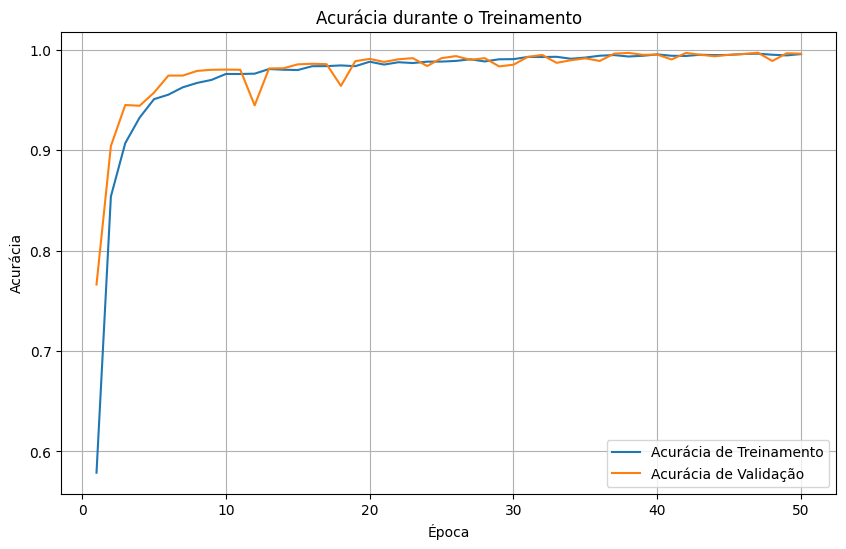

In [ ]:
# Extrair as métricas de treinamento
train_acc1 = model_train1.history['accuracy']
val_acc1 = model_train1.history['val_accuracy']

# Criar um gráfico da acurácia durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_acc1, label='Acurácia de Treinamento')
plt.plot(range(1, 51), val_acc1, label='Acurácia de Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data_predict2 = pd.DataFrame()
data_predict2['teste'] = y_test1
data_predict2['predicao'] = predicted_labels1
data_predict2

,teste,predicao
0,9,9
1,6,6
2,11,11
3,2,2
4,4,4
...,...,...
6691,11,11
6692,5,5
6693,9,9
6694,10,10


In [ ]:
data2 = data

In [ ]:
data3

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12
1,1.44,0,28,18,Sat May 27 00:28:18 2023,12
2,3.39,0,28,42,Sat May 27 00:28:42 2023,12
3,1.27,0,28,56,Sat May 27 00:28:56 2023,24
4,5.16,0,29,26,Sat May 27 00:29:26 2023,14
...,...,...,...,...,...,...
33472,2.68,5,11,41,Fri Oct 13 05:11:41 2023,19
33473,1.18,5,11,54,Fri Oct 13 05:11:54 2023,23
33474,1.62,5,12,12,Fri Oct 13 05:12:12 2023,13
33475,1.61,5,12,29,Fri Oct 13 05:12:29 2023,18


In [ ]:
data4 = data3
data = data3

data.head()
print(data.shape)

(33477, 6)


In [ ]:
data.head()

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12
1,1.44,0,28,18,Sat May 27 00:28:18 2023,12
2,3.39,0,28,42,Sat May 27 00:28:42 2023,12
3,1.27,0,28,56,Sat May 27 00:28:56 2023,24
4,5.16,0,29,26,Sat May 27 00:29:26 2023,14


In [ ]:
# Verificar se existem valores NaN na coluna "Odd_ajustada"
has_nan = data['Odd_ajustada'].isna().any()
if has_nan:
    print("Existem valores NaN na coluna 'Odd_ajustada'.")
else:
    print("Não existem valores NaN na coluna 'Odd_ajustada'.")


Não existem valores NaN na coluna 'Odd_ajustada'.


In [ ]:
data.head()

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12
1,1.44,0,28,18,Sat May 27 00:28:18 2023,12
2,3.39,0,28,42,Sat May 27 00:28:42 2023,12
3,1.27,0,28,56,Sat May 27 00:28:56 2023,24
4,5.16,0,29,26,Sat May 27 00:29:26 2023,14


In [ ]:
print(data.shape)

(33477, 65)


In [ ]:
array_categoriat = []
for name in data['tempo_em_segundos']:
  if name < 12:
    array_categoriat.append(1)
  elif name >= 12 and name < 13.5:
    array_categoriat.append(2)
  elif name >= 13.5 and name < 15:
    array_categoriat.append(3)
  elif name >= 15 and name < 16.5:
    array_categoriat.append(4)
  elif name >= 16.5 and name < 19:
    array_categoriat.append(5)
  elif name >= 19 and name < 21:
    array_categoriat.append(6)
  elif name >= 21 and name < 24:
    array_categoriat.append(7)
  elif name >= 24 and name < 27:
    array_categoriat.append(8)
  elif name >= 27 and name < 32:
    array_categoriat.append(9)
  elif name >= 32 and name < 40:
    array_categoriat.append(10)
  elif name >= 40:
    array_categoriat.append(11)

array_categoriat = pd.DataFrame(array_categoriat)
print(len(array_categoriat))
array_categoriat.columns = ['tempo_segundos_categoria']
#array_categoriat.head()
data = pd.concat([data, array_categoriat], axis = 1)

data['tempo_segundos_categoria'].describe()

data['media_movel_segundo5c'] = data['tempo_segundos_categoria'].rolling(window=5).mean()
data['media_movel_segundo10c'] = data['tempo_segundos_categoria'].rolling(window=10).mean()
data['media_movel_segundo20c'] = data['tempo_segundos_categoria'].rolling(window=20).mean()
data['media_movel_segundo40c'] = data['tempo_segundos_categoria'].rolling(window=40).mean()
data['media_movel_segundo80c'] = data['tempo_segundos_categoria'].rolling(window=80).mean()
data['media_movel_segundo160c'] = data['tempo_segundos_categoria'].rolling(window=160).mean()
data['media_movel_segundo320c'] = data['tempo_segundos_categoria'].rolling(window=320).mean()
data['media_movel_segundo640c'] = data['tempo_segundos_categoria'].rolling(window=640).mean()

data = data.fillna(data.mean())  # Preencher com a média da coluna

# Estatísticas Descritivas
#tsc - tempo segundos categoria
data['tsc_mediana5'] = data['tempo_segundos_categoria'].rolling(window=5).median()
data['tsc_mediana10'] = data['tempo_segundos_categoria'].rolling(window=10).median()
data['tsc_mediana20'] = data['tempo_segundos_categoria'].rolling(window=20).median()
data['tsc_mediana40'] = data['tempo_segundos_categoria'].rolling(window=40).median()
data['tsc_mediana80'] = data['tempo_segundos_categoria'].rolling(window=80).median()
data['tsc_mediana160'] = data['tempo_segundos_categoria'].rolling(window=160).median()
data['tsc_mediana320'] = data['tempo_segundos_categoria'].rolling(window=320).median()
data['tsc_mediana640'] = data['tempo_segundos_categoria'].rolling(window=640).median()

data['tsc_desvio_padrao5'] = data['tempo_segundos_categoria'].rolling(window=5).std()
data['tsc_desvio_padrao10'] = data['tempo_segundos_categoria'].rolling(window=10).std()
data['tsc_desvio_padrao20'] = data['tempo_segundos_categoria'].rolling(window=20).std()
data['tsc_desvio_padrao40'] = data['tempo_segundos_categoria'].rolling(window=40).std()
data['tsc_desvio_padrao80'] = data['tempo_segundos_categoria'].rolling(window=80).std()
data['tsc_desvio_padrao160'] = data['tempo_segundos_categoria'].rolling(window=160).std()
data['tsc_desvio_padrao320'] = data['tempo_segundos_categoria'].rolling(window=320).std()
data['tsc_desvio_padrao640'] = data['tempo_segundos_categoria'].rolling(window=640).std()

data['tsc_min5'] = data['tempo_segundos_categoria'].rolling(window=5).min()
data['tsc_min10'] = data['tempo_segundos_categoria'].rolling(window=10).min()
data['tsc_min20'] = data['tempo_segundos_categoria'].rolling(window=20).min()
data['tsc_min40'] = data['tempo_segundos_categoria'].rolling(window=40).min()
data['tsc_min80'] = data['tempo_segundos_categoria'].rolling(window=80).min()
data['tsc_min160'] = data['tempo_segundos_categoria'].rolling(window=160).min()
data['tsc_min320'] = data['tempo_segundos_categoria'].rolling(window=320).min()
data['tsc_min640'] = data['tempo_segundos_categoria'].rolling(window=640).min()

data['tsc_max5'] = data['tempo_segundos_categoria'].rolling(window=5).max()
data['tsc_max10'] = data['tempo_segundos_categoria'].rolling(window=10).max()
data['tsc_max20'] = data['tempo_segundos_categoria'].rolling(window=20).max()
data['tsc_max40'] = data['tempo_segundos_categoria'].rolling(window=40).max()
data['tsc_max80'] = data['tempo_segundos_categoria'].rolling(window=80).max()
data['tsc_max160'] = data['tempo_segundos_categoria'].rolling(window=160).max()
data['tsc_max320'] = data['tempo_segundos_categoria'].rolling(window=320).max()
data['tsc_max640'] = data['tempo_segundos_categoria'].rolling(window=640).max()

# Tendência das Odds
data['tsc_tendencia'] = data['tempo_segundos_categoria'].diff()

# Frequência de Categorias (assumindo que 'Odd_Categoria' é categórico)
data['tsc_frequencia5'] = data['tempo_segundos_categoria'].rolling(window=5).apply(lambda x: x.value_counts().idxmax())
data['tsc_frequencia10'] = data['tempo_segundos_categoria'].rolling(window=10).apply(lambda x: x.value_counts().idxmax())
data['tsc_frequencia20'] = data['tempo_segundos_categoria'].rolling(window=20).apply(lambda x: x.value_counts().idxmax())
data['tsc_frequencia40'] = data['tempo_segundos_categoria'].rolling(window=40).apply(lambda x: x.value_counts().idxmax())
data['tsc_frequencia80'] = data['tempo_segundos_categoria'].rolling(window=80).apply(lambda x: x.value_counts().idxmax())
data['tsc_frequencia160'] = data['tempo_segundos_categoria'].rolling(window=160).apply(lambda x: x.value_counts().idxmax())
data['tsc_frequencia320'] = data['tempo_segundos_categoria'].rolling(window=320).apply(lambda x: x.value_counts().idxmax())
data['tsc_frequencia640'] = data['tempo_segundos_categoria'].rolling(window=640).apply(lambda x: x.value_counts().idxmax())

# Tendência de Média Móvel
data['tendencia_media_movel_tsc5'] = data['media_movel_segundo5c'].diff()
data['tendencia_media_movel_tsc10'] = data['media_movel_segundo10c'].diff()
data['tendencia_media_movel_tsc20'] = data['media_movel_segundo20c'].diff()
data['tendencia_media_movel_tsc40'] = data['media_movel_segundo40c'].diff()
data['tendencia_media_movel_tsc80'] = data['media_movel_segundo80c'].diff()
data['tendencia_media_movel_tsc160'] = data['media_movel_segundo160c'].diff()
data['tendencia_media_movel_tsc320'] = data['media_movel_segundo320c'].diff()
data['tendencia_media_movel_tsc640'] = data['media_movel_segundo640c'].diff()

# Contagem de repetições das categorias
data['categoria_contagem_tsc'] = data['tempo_segundos_categoria'].map(data['tempo_segundos_categoria'].value_counts())

# Remova linhas com valores ausentes resultantes das operações de janelas
data = data.fillna(data.mean())

# Verifique se há valores nulos em cada coluna
valores_ausentes = data.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

data.head(20)
print(len(data))

33477


<ipython-input-40-5acdf8f86477>:43: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())  # Preencher com a média da coluna
<ipython-input-40-5acdf8f86477>:110: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Series([], dtype: int64)
33477


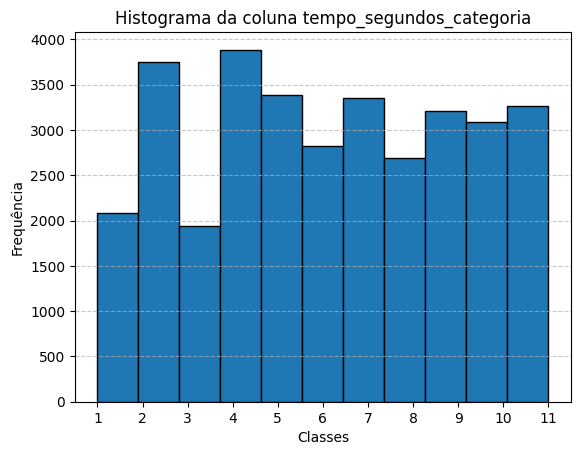

In [ ]:
# Configurar o histograma
plt.hist(data['tempo_segundos_categoria'], bins=11, edgecolor='k')  # O número de bins deve corresponder ao número de classes (12 no seu caso)
plt.title('Histograma da coluna tempo_segundos_categoria')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 12))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


<ipython-input-42-516b264cc2dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


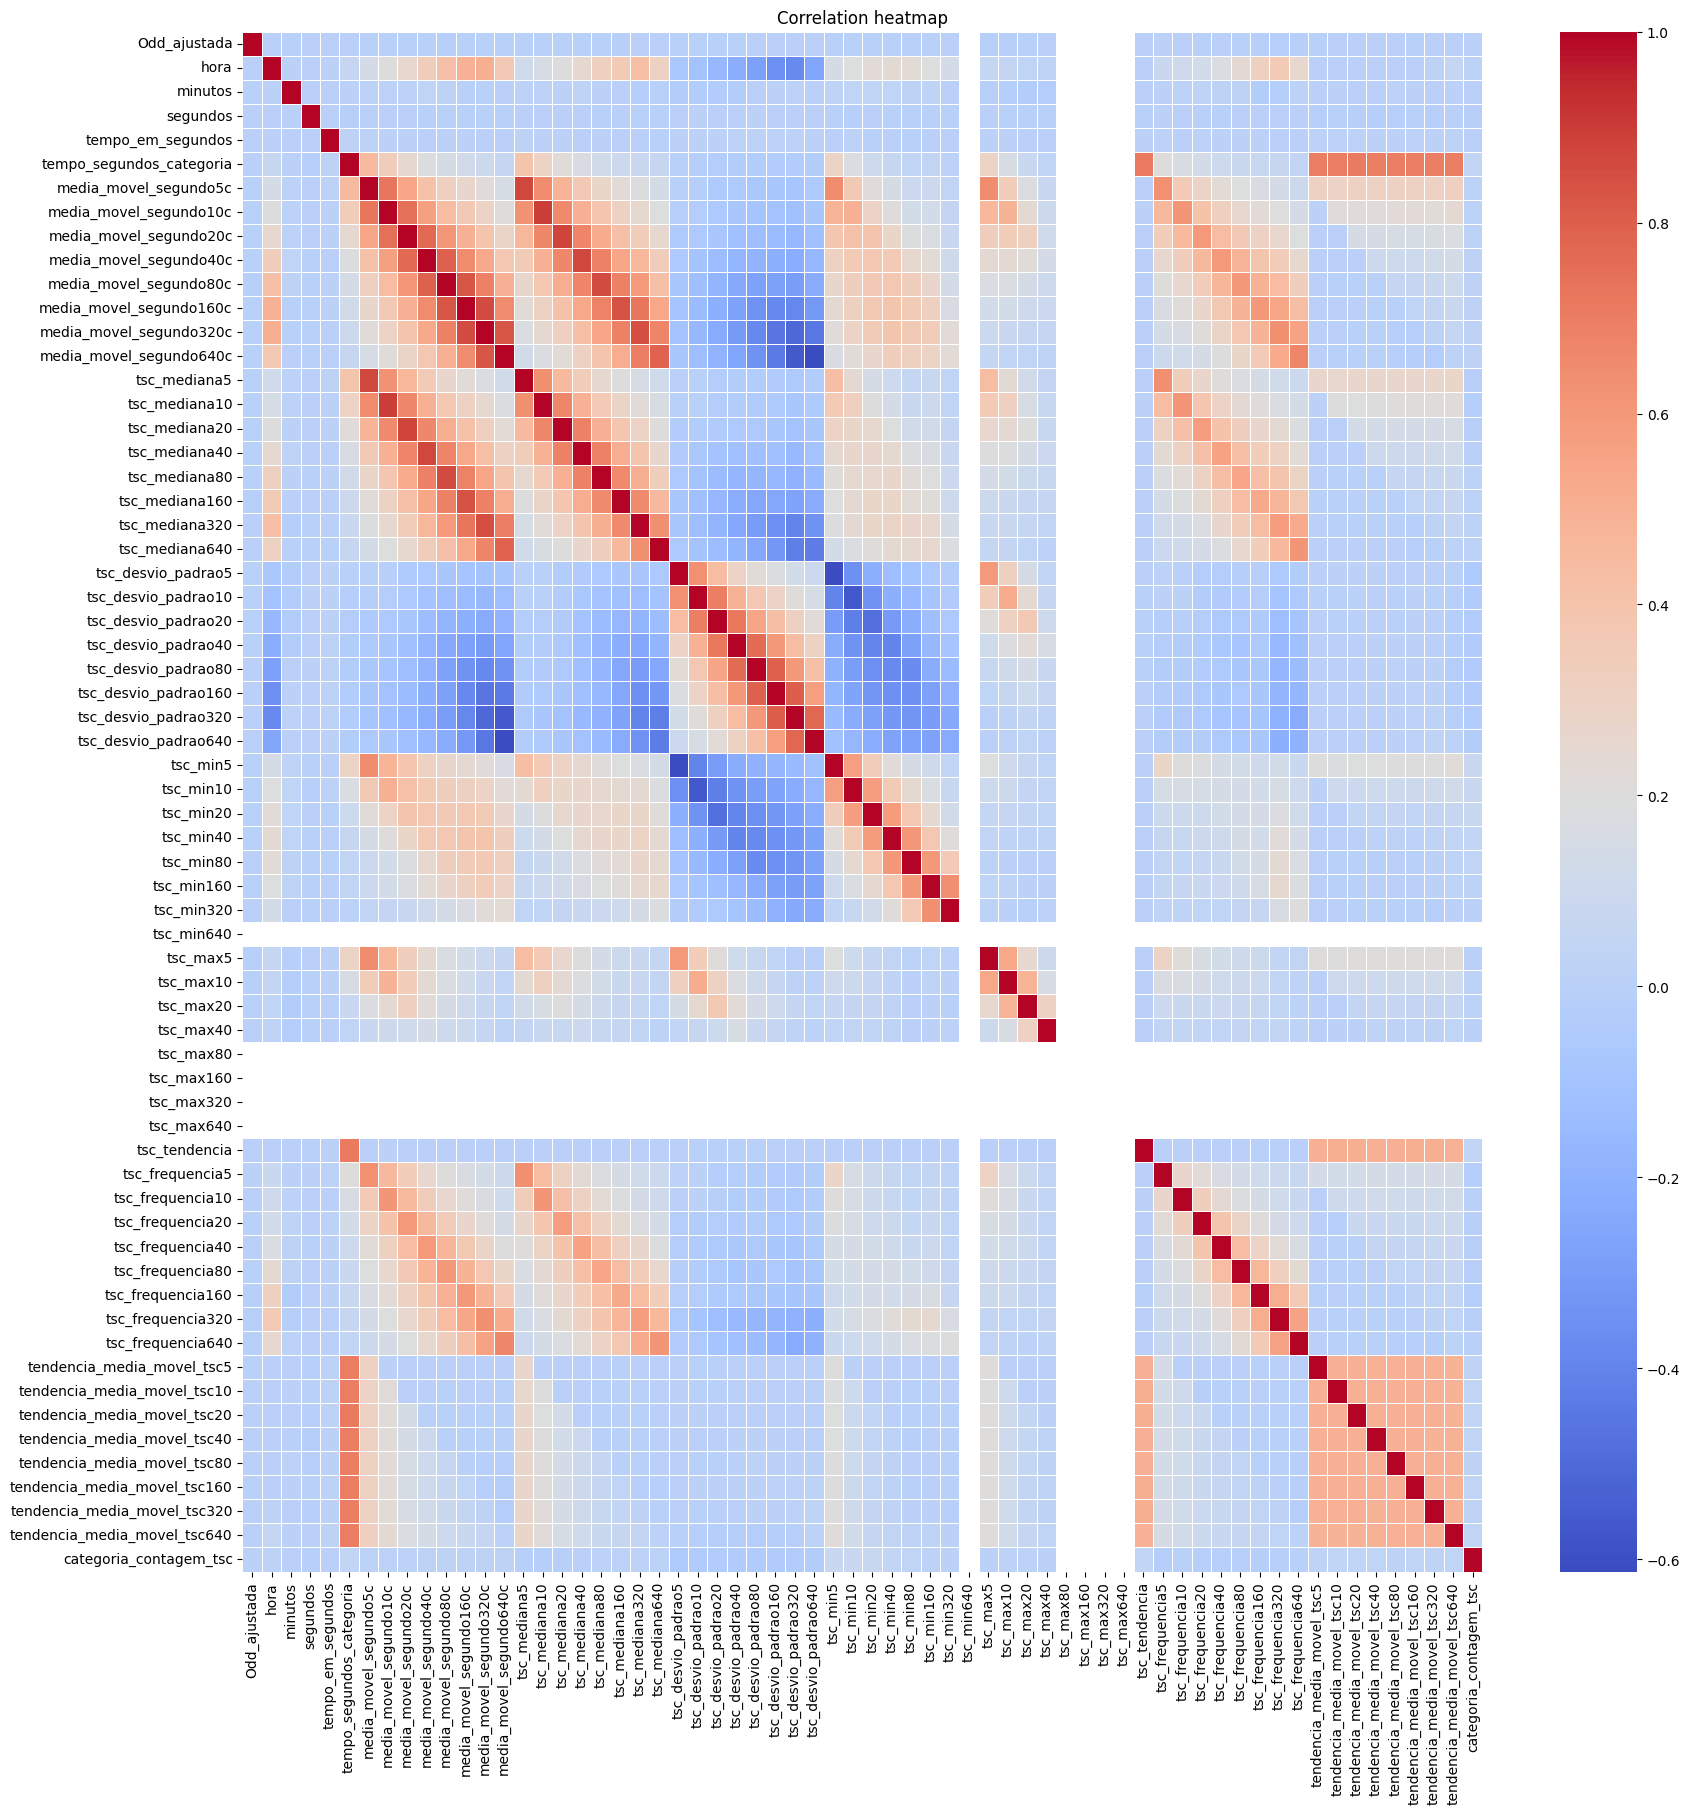

In [ ]:
# Calculando a matriz de correlação
corr_matrix = data.corr()

# Criando o heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=.5)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
data.columns

Index(['Odd_ajustada', 'hora', 'minutos', 'segundos', 'horario',
       'tempo_em_segundos', 'tempo_segundos_categoria',
       'media_movel_segundo5c', 'media_movel_segundo10c',
       'media_movel_segundo20c', 'media_movel_segundo40c',
       'media_movel_segundo80c', 'media_movel_segundo160c',
       'media_movel_segundo320c', 'media_movel_segundo640c', 'tsc_mediana5',
       'tsc_mediana10', 'tsc_mediana20', 'tsc_mediana40', 'tsc_mediana80',
       'tsc_mediana160', 'tsc_mediana320', 'tsc_mediana640',
       'tsc_desvio_padrao5', 'tsc_desvio_padrao10', 'tsc_desvio_padrao20',
       'tsc_desvio_padrao40', 'tsc_desvio_padrao80', 'tsc_desvio_padrao160',
       'tsc_desvio_padrao320', 'tsc_desvio_padrao640', 'tsc_min5', 'tsc_min10',
       'tsc_min20', 'tsc_min40', 'tsc_min80', 'tsc_min160', 'tsc_min320',
       'tsc_min640', 'tsc_max5', 'tsc_max10', 'tsc_max20', 'tsc_max40',
       'tsc_max80', 'tsc_max160', 'tsc_max320', 'tsc_max640', 'tsc_tendencia',
       'tsc_frequencia5', 'tsc_f

In [ ]:
# Separar recursos (X) e rótulos (y)
X3 = data[['media_movel_segundo5c', 'media_movel_segundo10c',
       'media_movel_segundo20c', 'media_movel_segundo40c',
       'media_movel_segundo80c', 'media_movel_segundo160c',
       'media_movel_segundo320c', 'media_movel_segundo640c', 'tsc_mediana5',
       'tsc_mediana10', 'tsc_mediana20', 'tsc_mediana40', 'tsc_mediana80',
       'tsc_mediana160', 'tsc_mediana320', 'tsc_mediana640',
       'tsc_desvio_padrao5', 'tsc_desvio_padrao10', 'tsc_desvio_padrao20',
       'tsc_desvio_padrao40', 'tsc_desvio_padrao80', 'tsc_desvio_padrao160',
       'tsc_desvio_padrao320', 'tsc_desvio_padrao640', 'tsc_min5', 'tsc_min10',
       'tsc_min20', 'tsc_min40', 'tsc_min80', 'tsc_min160', 'tsc_min320',
       'tsc_min640', 'tsc_max5', 'tsc_max10', 'tsc_max20', 'tsc_max40',
       'tsc_max80', 'tsc_max160', 'tsc_max320', 'tsc_max640', 'tsc_tendencia',
       'tsc_frequencia5', 'tsc_frequencia10', 'tsc_frequencia20',
       'tsc_frequencia40', 'tsc_frequencia80', 'tsc_frequencia160',
       'tsc_frequencia320', 'tsc_frequencia640', 'tendencia_media_movel_tsc5',
       'tendencia_media_movel_tsc10', 'tendencia_media_movel_tsc20',
       'tendencia_media_movel_tsc40', 'tendencia_media_movel_tsc80',
       'tendencia_media_movel_tsc160', 'tendencia_media_movel_tsc320',
       'tendencia_media_movel_tsc640', 'categoria_contagem_tsc']].values
y3 = data['tempo_segundos_categoria'].values

# Normalizar os recursos (importante para redes neurais)
X3 = scaler1.fit_transform(X3)

# Avaliar o modelo no conjunto de teste
accuracy3 = model1.evaluate(X3.reshape(X3.shape[0], X3.shape[1], 1), y3)[1]
print(f'Acurácia do modelo: {accuracy3}')

# Fazer previsões
predictions3 = model1.predict(X3.reshape(X3.shape[0], X3.shape[1], 1))

# Arredondar as previsões para obter rótulos de classe
predicted_labels3 = np.argmax(predictions3, axis=1)

# Adicionar as previsões ao DataFrame
data['previsoes'] = predicted_labels3

# Comparar as previsões com os rótulos reais
data['acertos'] = np.where(data['tempo_segundos_categoria'] == data['previsoes'], 1, 2)

# Agora a coluna 'acertos' contém 1 para acertos e 2 para erros

# Calcular o F1-Score
f1_3 = f1_score(y3, predicted_labels3, average='weighted')

print(f'F1-Score do modelo: {f1_3}')

1047/1047 [==============================] - 48s 45ms/step - loss: 0.0137 - accuracy: 0.9981
Acurácia do modelo: 0.9980882406234741
1047/1047 [==============================] - 46s 44ms/step
F1-Score do modelo: 0.9980882462565235


In [ ]:
#1 é acerto; 2 é erro
data['acertos'].describe()

count    33477.000000
mean         1.001912
std          0.043683
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: acertos, dtype: float64

In [ ]:
data.shape

(33477, 67)

In [ ]:
# Repita para as outras colunas de médias móveis
k1_media_movel_segundo5c = data['tempo_segundos_categoria'].rolling(window=5).mean().iloc[-1]
k1_media_movel_segundo10c = data['tempo_segundos_categoria'].rolling(window=10).mean().iloc[-1]
k1_media_movel_segundo20c = data['tempo_segundos_categoria'].rolling(window=20).mean().iloc[-1]
k1_media_movel_segundo40c = data['tempo_segundos_categoria'].rolling(window=40).mean().iloc[-1]
k1_media_movel_segundo80c = data['tempo_segundos_categoria'].rolling(window=80).mean().iloc[-1]
k1_media_movel_segundo160c = data['tempo_segundos_categoria'].rolling(window=160).mean().iloc[-1]
k1_media_movel_segundo320c = data['tempo_segundos_categoria'].rolling(window=320).mean().iloc[-1]
k1_media_movel_segundo640c = data['tempo_segundos_categoria'].rolling(window=640).mean().iloc[-1]

# Estatísticas Descritivas
#tsc - tempo segundos categoria
k1_tsc_mediana5 = data['tempo_segundos_categoria'].rolling(window=5).median().iloc[-1]
k1_tsc_mediana10 = data['tempo_segundos_categoria'].rolling(window=10).median().iloc[-1]
k1_tsc_mediana20 = data['tempo_segundos_categoria'].rolling(window=20).median().iloc[-1]
k1_tsc_mediana40 = data['tempo_segundos_categoria'].rolling(window=40).median().iloc[-1]
k1_tsc_mediana80 = data['tempo_segundos_categoria'].rolling(window=80).median().iloc[-1]
k1_tsc_mediana160 = data['tempo_segundos_categoria'].rolling(window=160).median().iloc[-1]
k1_tsc_mediana320 = data['tempo_segundos_categoria'].rolling(window=320).median().iloc[-1]
k1_tsc_mediana640 = data['tempo_segundos_categoria'].rolling(window=640).median().iloc[-1]

k1_tsc_desvio_padrao5 = data['tempo_segundos_categoria'].rolling(window=5).std().iloc[-1]
k1_tsc_desvio_padrao10 = data['tempo_segundos_categoria'].rolling(window=10).std().iloc[-1]
k1_tsc_desvio_padrao20 = data['tempo_segundos_categoria'].rolling(window=20).std().iloc[-1]
k1_tsc_desvio_padrao40 = data['tempo_segundos_categoria'].rolling(window=40).std().iloc[-1]
k1_tsc_desvio_padrao80 = data['tempo_segundos_categoria'].rolling(window=80).std().iloc[-1]
k1_tsc_desvio_padrao160 = data['tempo_segundos_categoria'].rolling(window=160).std().iloc[-1]
k1_tsc_desvio_padrao320 = data['tempo_segundos_categoria'].rolling(window=320).std().iloc[-1]
k1_tsc_desvio_padrao640 = data['tempo_segundos_categoria'].rolling(window=640).std().iloc[-1]

k1_tsc_min5 = data['tempo_segundos_categoria'].rolling(window=5).min().iloc[-1]
k1_tsc_min10 = data['tempo_segundos_categoria'].rolling(window=10).min().iloc[-1]
k1_tsc_min20 = data['tempo_segundos_categoria'].rolling(window=20).min().iloc[-1]
k1_tsc_min40 = data['tempo_segundos_categoria'].rolling(window=40).min().iloc[-1]
k1_tsc_min80 = data['tempo_segundos_categoria'].rolling(window=80).min().iloc[-1]
k1_tsc_min160 = data['tempo_segundos_categoria'].rolling(window=160).min().iloc[-1]
k1_tsc_min320 = data['tempo_segundos_categoria'].rolling(window=320).min().iloc[-1]
k1_tsc_min640 = data['tempo_segundos_categoria'].rolling(window=640).min().iloc[-1]

k1_tsc_max5 = data['tempo_segundos_categoria'].rolling(window=5).max().iloc[-1]
k1_tsc_max10 = data['tempo_segundos_categoria'].rolling(window=10).max().iloc[-1]
k1_tsc_max20 = data['tempo_segundos_categoria'].rolling(window=20).max().iloc[-1]
k1_tsc_max40 = data['tempo_segundos_categoria'].rolling(window=40).max().iloc[-1]
k1_tsc_max80 = data['tempo_segundos_categoria'].rolling(window=80).max().iloc[-1]
k1_tsc_max160 = data['tempo_segundos_categoria'].rolling(window=160).max().iloc[-1]
k1_tsc_max320 = data['tempo_segundos_categoria'].rolling(window=320).max().iloc[-1]
k1_tsc_max640 = data['tempo_segundos_categoria'].rolling(window=640).max().iloc[-1]

# Tendência das Odds
k1_tsc_tendencia = data['tempo_segundos_categoria'].diff().iloc[-1]

# Frequência de Categorias (assumindo que 'Odd_Categoria' é categórico)
k1_tsc_frequencia5 = data['tempo_segundos_categoria'].rolling(window=5).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k1_tsc_frequencia10 = data['tempo_segundos_categoria'].rolling(window=10).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k1_tsc_frequencia20 = data['tempo_segundos_categoria'].rolling(window=20).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k1_tsc_frequencia40 = data['tempo_segundos_categoria'].rolling(window=40).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k1_tsc_frequencia80 = data['tempo_segundos_categoria'].rolling(window=80).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k1_tsc_frequencia160 = data['tempo_segundos_categoria'].rolling(window=160).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k1_tsc_frequencia320 = data['tempo_segundos_categoria'].rolling(window=320).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k1_tsc_frequencia640 = data['tempo_segundos_categoria'].rolling(window=640).apply(lambda x: x.value_counts().idxmax()).iloc[-1]

# Tendência de Média Móvel
k1_tendencia_media_movel_tsc5 = data['media_movel_segundo5c'].diff().iloc[-1]
k1_tendencia_media_movel_tsc10 = data['media_movel_segundo10c'].diff().iloc[-1]
k1_tendencia_media_movel_tsc20 = data['media_movel_segundo20c'].diff().iloc[-1]
k1_tendencia_media_movel_tsc40 = data['media_movel_segundo40c'].diff().iloc[-1]
k1_tendencia_media_movel_tsc80 = data['media_movel_segundo80c'].diff().iloc[-1]
k1_tendencia_media_movel_tsc160 = data['media_movel_segundo160c'].diff().iloc[-1]
k1_tendencia_media_movel_tsc320 = data['media_movel_segundo320c'].diff().iloc[-1]
k1_tendencia_media_movel_tsc640 = data['media_movel_segundo640c'].diff().iloc[-1]

# Contagem de repetições das categorias
k1_categoria_contagem_tsc = data['tempo_segundos_categoria'].map(data['tempo_segundos_categoria'].value_counts()).iloc[-1]

# Crie um dicionário com os valores calculados
k1_values = {'media_movel_segundo5c': k1_media_movel_segundo5c,
    'media_movel_segundo10c': k1_media_movel_segundo10c,
    'media_movel_segundo20c': k1_media_movel_segundo20c,
    'media_movel_segundo40c': k1_media_movel_segundo40c,
    'media_movel_segundo80c': k1_media_movel_segundo80c,
    'media_movel_segundo160c': k1_media_movel_segundo160c,
    'media_movel_segundo320c': k1_media_movel_segundo320c,
    'media_movel_segundo640c': k1_media_movel_segundo640c,
    'tsc_mediana5': k1_tsc_mediana5,
    'tsc_mediana10': k1_tsc_mediana10,
    'tsc_mediana20': k1_tsc_mediana20,
    'tsc_mediana40': k1_tsc_mediana40,
    'tsc_mediana80': k1_tsc_mediana80,
    'tsc_mediana160': k1_tsc_mediana160,
    'tsc_mediana320': k1_tsc_mediana320,
    'tsc_mediana640': k1_tsc_mediana640,
    'tsc_desvio_padrao5': k1_tsc_desvio_padrao5,
    'tsc_desvio_padrao10': k1_tsc_desvio_padrao10,
    'tsc_desvio_padrao20':k1_tsc_desvio_padrao20,
    'tsc_desvio_padrao40': k1_tsc_desvio_padrao40,
    'tsc_desvio_padrao80':k1_tsc_desvio_padrao80,
    'tsc_desvio_padrao160':k1_tsc_desvio_padrao160,
    'tsc_desvio_padrao320':k1_tsc_desvio_padrao320,
    'tsc_desvio_padrao640':k1_tsc_desvio_padrao640,
    'tsc_min5':k1_tsc_min5,
    'tsc_min10':k1_tsc_min10,
    'tsc_min20':k1_tsc_min20,
    'tsc_min40':k1_tsc_min40,
    'tsc_min80':k1_tsc_min80,
    'tsc_min160':k1_tsc_min160,
    'tsc_min320':k1_tsc_min320,
    'tsc_min640':k1_tsc_min640,
    'tsc_max5':k1_tsc_max5,
    'tsc_max10':k1_tsc_max10,
    'tsc_max20':k1_tsc_max20,
    'tsc_max40':k1_tsc_max40,
    'tsc_max80':k1_tsc_max80,
    'tsc_max160':k1_tsc_max160,
    'tsc_max320':k1_tsc_max320,
    'tsc_max640':k1_tsc_max640,
    'tsc_tendencia':k1_tsc_tendencia,
    'tsc_frequencia5': k1_tsc_frequencia5,
    'tsc_frequencia10':k1_tsc_frequencia10,
    'tsc_frequencia20':k1_tsc_frequencia20,
    'tsc_frequencia40':k1_tsc_frequencia40,
    'tsc_frequencia80':k1_tsc_frequencia80,
    'tsc_frequencia160':k1_tsc_frequencia160,
    'tsc_frequencia320':k1_tsc_frequencia320,
    'tsc_frequencia640':k1_tsc_frequencia640,
    'tendencia_media_movel_tsc5': k1_tendencia_media_movel_tsc5,
    'tendencia_media_movel_tsc10': k1_tendencia_media_movel_tsc10,
    'tendencia_media_movel_tsc20': k1_tendencia_media_movel_tsc20,
    'tendencia_media_movel_tsc40': k1_tendencia_media_movel_tsc40,
    'tendencia_media_movel_tsc80': k1_tendencia_media_movel_tsc80,
    'tendencia_media_movel_tsc160': k1_tendencia_media_movel_tsc160,
    'tendencia_media_movel_tsc320': k1_tendencia_media_movel_tsc320,
    'tendencia_media_movel_tsc640': k1_tendencia_media_movel_tsc640,
    'categoria_contagem_tsc':k1_categoria_contagem_tsc}

print(k1_values)
print(type(k1_values))

# Especifique um índice (por exemplo, 'k1') para a entrada
k_entrada = pd.Series(k1_values, name=len(data)+1).to_frame().T

# Agora 'k1_values' contém a entrada k+1 em formato de DataFrame com índice 'k1'
print(k_entrada)
k_entrada.shape
k_entrada.columns
print(type(k_entrada))

X4 = k_entrada[['media_movel_segundo5c', 'media_movel_segundo10c',
       'media_movel_segundo20c', 'media_movel_segundo40c',
       'media_movel_segundo80c', 'media_movel_segundo160c',
       'media_movel_segundo320c', 'media_movel_segundo640c', 'tsc_mediana5',
       'tsc_mediana10', 'tsc_mediana20', 'tsc_mediana40', 'tsc_mediana80',
       'tsc_mediana160', 'tsc_mediana320', 'tsc_mediana640',
       'tsc_desvio_padrao5', 'tsc_desvio_padrao10', 'tsc_desvio_padrao20',
       'tsc_desvio_padrao40', 'tsc_desvio_padrao80', 'tsc_desvio_padrao160',
       'tsc_desvio_padrao320', 'tsc_desvio_padrao640', 'tsc_min5', 'tsc_min10',
       'tsc_min20', 'tsc_min40', 'tsc_min80', 'tsc_min160', 'tsc_min320',
       'tsc_min640', 'tsc_max5', 'tsc_max10', 'tsc_max20', 'tsc_max40',
       'tsc_max80', 'tsc_max160', 'tsc_max320', 'tsc_max640', 'tsc_tendencia',
       'tsc_frequencia5', 'tsc_frequencia10', 'tsc_frequencia20',
       'tsc_frequencia40', 'tsc_frequencia80', 'tsc_frequencia160',
       'tsc_frequencia320', 'tsc_frequencia640', 'tendencia_media_movel_tsc5',
       'tendencia_media_movel_tsc10', 'tendencia_media_movel_tsc20',
       'tendencia_media_movel_tsc40', 'tendencia_media_movel_tsc80',
       'tendencia_media_movel_tsc160', 'tendencia_media_movel_tsc320',
       'tendencia_media_movel_tsc640', 'categoria_contagem_tsc']].values

X4 = scaler1.transform(X4)

# Fazer previsões
predictions4 = model1.predict(X4.reshape(X4.shape[0], X4.shape[1], 1))

# Arredondar as previsões para obter rótulos de classe
predicted_labels4 = np.argmax(predictions4, axis=1)

# Adicionar as previsões ao DataFrame
k_entrada['tempo_segundos_categoria'] = predicted_labels4

k_entrada['tempo_segundos_categoria']
k_entrada.shape
print(type(k_entrada['tempo_segundos_categoria']))

{'media_movel_segundo5c': 5.0, 'media_movel_segundo10c': 6.0, 'media_movel_segundo20c': 5.45, 'media_movel_segundo40c': 5.875, 'media_movel_segundo80c': 6.1875, 'media_movel_segundo160c': 5.79375, 'media_movel_segundo320c': 6.040625, 'media_movel_segundo640c': 5.828125, 'tsc_mediana5': 5.0, 'tsc_mediana10': 5.5, 'tsc_mediana20': 5.0, 'tsc_mediana40': 5.5, 'tsc_mediana80': 6.0, 'tsc_mediana160': 5.5, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.8708286933870533, 'tsc_desvio_padrao10': 2.8674417556808574, 'tsc_desvio_padrao20': 3.203205631205967, 'tsc_desvio_padrao40': 3.1147910165728994, 'tsc_desvio_padrao80': 3.2843848045415966, 'tsc_desvio_padrao160': 3.168430905435015, 'tsc_desvio_padrao320': 3.16350261963721, 'tsc_desvio_padrao640': 3.15858711059411, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_min640': 1.0, 'tsc_max5': 7.0, 'tsc_max10': 11.0, 'tsc_max20': 11.0, 'tsc_max40

In [ ]:
if int(k_entrada['tempo_segundos_categoria']) == 1:
  meand = 8
  print(meand)
  k_entrada['tempo_em_segundos'] = meand
elif int(k_entrada['tempo_segundos_categoria']) == 2:
  meand = (12 + 13.5) / 2
  print(meand)
  k_entrada['tempo_em_segundos'] = meand
elif int(k_entrada['tempo_segundos_categoria']) == 3:
  meand = (13.5 + 15) / 2
  print(meand)
  k_entrada['tempo_em_segundos'] = meand
elif int(k_entrada['tempo_segundos_categoria']) == 4:
  meand = (15 + 16.5) / 2
  print(meand)
  k_entrada['tempo_em_segundos'] = meand
elif int(k_entrada['tempo_segundos_categoria']) == 5:
  meand = (16.5 + 19) / 2
  print(meand)
  k_entrada['tempo_em_segundos'] = meand
elif int(k_entrada['tempo_segundos_categoria']) == 6:
  meand = (19 + 21) / 2
  print(meand)
  k_entrada['tempo_em_segundos'] = meand
elif int(k_entrada['tempo_segundos_categoria']) == 7:
  meand = (21 + 24) / 2
  print(meand)
  k_entrada['tempo_em_segundos'] = meand
elif int(k_entrada['tempo_segundos_categoria']) == 8:
  meand = (24 + 27) / 2
  print(meand)
  k_entrada['tempo_em_segundos'] = meand
elif int(k_entrada['tempo_segundos_categoria']) == 9:
  meand = (27 + 32) / 2
  print(meand)
  k_entrada['tempo_em_segundos'] = meand
elif int(k_entrada['tempo_segundos_categoria']) == 10:
  meand = (32 + 40) / 2
  print(meand)
  k_entrada['tempo_em_segundos'] = meand
else:
  k_entrada['tempo_em_segundos'] = 60

k_entrada.shape
print(k_entrada['tempo_em_segundos'])

17.75
33478    17.75
Name: tempo_em_segundos, dtype: float64


In [ ]:
from datetime import timedelta

In [ ]:
# Obtenha o último valor da coluna 'horario' em 'data'
ultimo_horario = pd.to_datetime(data['horario'].iloc[-1])

# Obtenha a quantidade de segundos de 'k_entrada'
segundos_a_adicionar = k_entrada['tempo_em_segundos'].item()

# Converta a quantidade de segundos em um objeto timedelta
delta_tempo = timedelta(seconds=segundos_a_adicionar)

# Adicione o timedelta ao último horário
novo_horario = ultimo_horario + delta_tempo

# Resultado
print(novo_horario)
k_entrada['horario'] = novo_horario

k_entrada['hora'] = novo_horario.hour
k_entrada['minutos'] = novo_horario.minute
k_entrada['segundos'] = novo_horario.second

if int(k_entrada['hora']) >= 6 and int(k_entrada['hora']) <  12:
  k_entrada['parte_do_dia'] = 1
elif int(k_entrada['hora']) >= 12 and int(k_entrada['hora']) < 18:
  k_entrada['parte_do_dia'] = 2
elif 18 <= int(k_entrada['hora']) < 24:
  k_entrada['parte_do_dia'] = 3
else:
  k_entrada['parte_do_dia'] = 4
print(k_entrada['parte_do_dia'])

2023-10-13 05:12:58.750000
33478    4
Name: parte_do_dia, dtype: int64


In [ ]:
k_entrada.columns

Index(['media_movel_segundo5c', 'media_movel_segundo10c',
       'media_movel_segundo20c', 'media_movel_segundo40c',
       'media_movel_segundo80c', 'media_movel_segundo160c',
       'media_movel_segundo320c', 'media_movel_segundo640c', 'tsc_mediana5',
       'tsc_mediana10', 'tsc_mediana20', 'tsc_mediana40', 'tsc_mediana80',
       'tsc_mediana160', 'tsc_mediana320', 'tsc_mediana640',
       'tsc_desvio_padrao5', 'tsc_desvio_padrao10', 'tsc_desvio_padrao20',
       'tsc_desvio_padrao40', 'tsc_desvio_padrao80', 'tsc_desvio_padrao160',
       'tsc_desvio_padrao320', 'tsc_desvio_padrao640', 'tsc_min5', 'tsc_min10',
       'tsc_min20', 'tsc_min40', 'tsc_min80', 'tsc_min160', 'tsc_min320',
       'tsc_min640', 'tsc_max5', 'tsc_max10', 'tsc_max20', 'tsc_max40',
       'tsc_max80', 'tsc_max160', 'tsc_max320', 'tsc_max640', 'tsc_tendencia',
       'tsc_frequencia5', 'tsc_frequencia10', 'tsc_frequencia20',
       'tsc_frequencia40', 'tsc_frequencia80', 'tsc_frequencia160',
       'tsc_frequen

In [ ]:
data5 = data4
data = data4
print(data.shape)

(33477, 6)


In [ ]:
data.head()

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12
1,1.44,0,28,18,Sat May 27 00:28:18 2023,12
2,3.39,0,28,42,Sat May 27 00:28:42 2023,12
3,1.27,0,28,56,Sat May 27 00:28:56 2023,24
4,5.16,0,29,26,Sat May 27 00:29:26 2023,14


In [ ]:
# Verificar se existem valores NaN na coluna "Odd_ajustada"
has_nan = data['Odd_ajustada'].isna().any()
if has_nan:
    print("Existem valores NaN na coluna 'Odd_ajustada'.")
else:
    print("Não existem valores NaN na coluna 'Odd_ajustada'.")


Não existem valores NaN na coluna 'Odd_ajustada'.


In [ ]:
data.columns

Index(['Odd_ajustada', 'hora', 'minutos', 'segundos', 'horario',
       'tempo_em_segundos'],
      dtype='object')

In [ ]:
print(k_entrada['tempo_em_segundos'])

33478    17.75
Name: tempo_em_segundos, dtype: float64


In [ ]:
data.head()

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12
1,1.44,0,28,18,Sat May 27 00:28:18 2023,12
2,3.39,0,28,42,Sat May 27 00:28:42 2023,12
3,1.27,0,28,56,Sat May 27 00:28:56 2023,24
4,5.16,0,29,26,Sat May 27 00:29:26 2023,14


In [ ]:
geral_cat = []
for name in data['Odd_ajustada']:
  #print(name)
  if name < 1.05:
    geral_cat.append(1)
  elif name >= 1.05 and name < 1.15:
    geral_cat.append(2)
  elif name >= 1.15 and name < 1.3:
    geral_cat.append(3)
  elif name >= 1.3 and name < 1.45:
    geral_cat.append(4)
  elif name >= 1.45 and name < 1.7:
    geral_cat.append(5)
  elif name >= 1.7 and name < 2.1:
    geral_cat.append(6)
  elif name >= 2.1 and name < 2.6:
    geral_cat.append(7)
  elif name >= 2.6 and name < 3.5:
    geral_cat.append(8)
  elif name >= 3.5 and name < 5:
    geral_cat.append(9)
  elif name >= 5 and name < 10:
    geral_cat.append(10)
  elif name >= 10:
    geral_cat.append(11)
print(len(geral_cat))
geral_cat1 = pd.DataFrame([geral_cat]).T
geral_cat1.columns = ['Odd_Categoria']
data = pd.concat([data, geral_cat1], axis = 1)

data['Odd_Categoria'].describe()
part = []
print(len(data))
for k in range(1, len(data)):
    #print(k, data['hora'][k], type(data['hora'][k]))
    if data['hora'][k] >= 6 and data['hora'][k] <  12:
        part.append(1)
    elif data['hora'][k] >= 12 and data['hora'][k] < 18:
        part.append(2)
    elif 18 <= data['hora'][k] < 24:
        part.append(3)
    else:
        part.append(4)
part1 = np.ones(len(data), dtype = int)
for i in range(0, len(data)):
    if i == 0:
        part1[i] = part[i]
    else:
        part1[i] = part[i - 1]

data['parte_do_dia'] = part1

print(len(part1))
print(part1)

# Calcule o terceiro quartil (75%)
third_quartile = data['tempo_em_segundos'].quantile(0.75)

# Filtre os dados para manter apenas os valores abaixo do terceiro quartil
data = data[data['tempo_em_segundos'] <= 300]

# Atualize a coluna 'hora' após a remoção de linhas
data['hora'] = data['horario'].apply(lambda x: datetime.datetime.strptime(x, "%a %b %d %H:%M:%S %Y").hour)

# Verifique novamente a descrição estatística após a remoção
print(data['tempo_em_segundos'].describe())

data['media_movel_segundo5'] = data['tempo_em_segundos'].rolling(window=5).mean()
data['media_movel_segundo10'] = data['tempo_em_segundos'].rolling(window=10).mean()
data['media_movel_segundo20'] = data['tempo_em_segundos'].rolling(window=20).mean()
data['media_movel_segundo40'] = data['tempo_em_segundos'].rolling(window=40).mean()
data['media_movel_segundo80'] = data['tempo_em_segundos'].rolling(window=80).mean()
data['media_movel_segundo160'] = data['tempo_em_segundos'].rolling(window=160).mean()
data['media_movel_segundo320'] = data['tempo_em_segundos'].rolling(window=320).mean()
data['media_movel_segundo640'] = data['tempo_em_segundos'].rolling(window=640).mean()

data['odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5).mean()
data['odd_categoria_media_movel10'] = data['Odd_Categoria'].rolling(window=10).mean()
data['odd_categoria_media_movel20'] = data['Odd_Categoria'].rolling(window=20).mean()
data['odd_categoria_media_movel40'] = data['Odd_Categoria'].rolling(window=40).mean()
data['odd_categoria_media_movel80'] = data['Odd_Categoria'].rolling(window=80).mean()
data['odd_categoria_media_movel160'] = data['Odd_Categoria'].rolling(window=160).mean()
data['odd_categoria_media_movel320'] = data['Odd_Categoria'].rolling(window=320).mean()
data['odd_categoria_media_movel640'] = data['Odd_Categoria'].rolling(window=640).mean()

data = data.fillna(data.mean())  # Preencher com a média da coluna

# Estatísticas Descritivas
data['odd_mediana5'] = data['Odd_Categoria'].rolling(window=5).median()
data['odd_mediana10'] = data['Odd_Categoria'].rolling(window=10).median()
data['odd_mediana20'] = data['Odd_Categoria'].rolling(window=20).median()
data['odd_mediana40'] = data['Odd_Categoria'].rolling(window=40).median()
data['odd_mediana80'] = data['Odd_Categoria'].rolling(window=80).median()
data['odd_mediana160'] = data['Odd_Categoria'].rolling(window=160).median()
data['odd_mediana320'] = data['Odd_Categoria'].rolling(window=320).median()
data['odd_mediana640'] = data['Odd_Categoria'].rolling(window=640).median()

data['odd_desvio_padrao5'] = data['Odd_Categoria'].rolling(window=5).std()
data['odd_desvio_padrao10'] = data['Odd_Categoria'].rolling(window=10).std()
data['odd_desvio_padrao20'] = data['Odd_Categoria'].rolling(window=20).std()
data['odd_desvio_padrao40'] = data['Odd_Categoria'].rolling(window=40).std()
data['odd_desvio_padrao80'] = data['Odd_Categoria'].rolling(window=80).std()
data['odd_desvio_padrao160'] = data['Odd_Categoria'].rolling(window=160).std()
data['odd_desvio_padrao320'] = data['Odd_Categoria'].rolling(window=320).std()
data['odd_desvio_padrao640'] = data['Odd_Categoria'].rolling(window=640).std()

data['odd_min5'] = data['Odd_Categoria'].rolling(window=5).min()
data['odd_min10'] = data['Odd_Categoria'].rolling(window=10).min()
data['odd_min20'] = data['Odd_Categoria'].rolling(window=20).min()
data['odd_min40'] = data['Odd_Categoria'].rolling(window=40).min()
data['odd_min80'] = data['Odd_Categoria'].rolling(window=80).min()
data['odd_min160'] = data['Odd_Categoria'].rolling(window=160).min()
data['odd_min320'] = data['Odd_Categoria'].rolling(window=320).min()
data['odd_min640'] = data['Odd_Categoria'].rolling(window=640).min()

data['odd_max5'] = data['Odd_Categoria'].rolling(window=5).max()
data['odd_max10'] = data['Odd_Categoria'].rolling(window=10).max()
data['odd_max20'] = data['Odd_Categoria'].rolling(window=20).max()
data['odd_max40'] = data['Odd_Categoria'].rolling(window=40).max()
data['odd_max80'] = data['Odd_Categoria'].rolling(window=80).max()
data['odd_max160'] = data['Odd_Categoria'].rolling(window=160).max()
data['odd_max320'] = data['Odd_Categoria'].rolling(window=320).max()
data['odd_max640'] = data['Odd_Categoria'].rolling(window=640).max()

# Tendência das Odds
data['odd_tendencia'] = data['Odd_Categoria'].diff()

# Frequência de Categorias (assumindo que 'Odd_Categoria' é categórico)
data['categoria_frequencia5'] = data['Odd_Categoria'].rolling(window=5).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia10'] = data['Odd_Categoria'].rolling(window=10).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia20'] = data['Odd_Categoria'].rolling(window=20).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia40'] = data['Odd_Categoria'].rolling(window=40).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia80'] = data['Odd_Categoria'].rolling(window=80).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia160'] = data['Odd_Categoria'].rolling(window=160).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia320'] = data['Odd_Categoria'].rolling(window=320).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia640'] = data['Odd_Categoria'].rolling(window=640).apply(lambda x: x.value_counts().idxmax())

# Tendência de Média Móvel
data['tendencia_media_movelt5'] = data['media_movel_segundo5'].diff()
data['tendencia_media_movelt10'] = data['media_movel_segundo10'].diff()
data['tendencia_media_movelt20'] = data['media_movel_segundo20'].diff()
data['tendencia_media_movelt40'] = data['media_movel_segundo40'].diff()
data['tendencia_media_movelt80'] = data['media_movel_segundo80'].diff()
data['tendencia_media_movelt160'] = data['media_movel_segundo160'].diff()
data['tendencia_media_movelt320'] = data['media_movel_segundo320'].diff()
data['tendencia_media_movelt640'] = data['media_movel_segundo640'].diff()
data['tendencia_media_movel5'] = data['odd_categoria_media_movel5'].diff()
data['tendencia_media_movel10'] = data['odd_categoria_media_movel10'].diff()
data['tendencia_media_movel20'] = data['odd_categoria_media_movel20'].diff()
data['tendencia_media_movel40'] = data['odd_categoria_media_movel40'].diff()
data['tendencia_media_movel80'] = data['odd_categoria_media_movel80'].diff()
data['tendencia_media_movel160'] = data['odd_categoria_media_movel160'].diff()
data['tendencia_media_movel320'] = data['odd_categoria_media_movel320'].diff()
data['tendencia_media_movel640'] = data['odd_categoria_media_movel640'].diff()

# Contagem de repetições das categorias
data['categoria_contagem'] = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts())

# Remova linhas com valores ausentes resultantes das operações de janelas
data = data.fillna(data.mean())

# Verifique se há valores nulos em cada coluna
valores_ausentes = data.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

data.head(20)
data.shape

33477
33477
33477
[4 4 4 ... 4 4 4]
count    33401.000000
mean        23.389928
std         13.197205
min          3.000000
25%         15.000000
50%         20.000000
75%         28.000000
max        292.000000
Name: tempo_em_segundos, dtype: float64


<ipython-input-58-dabde68a7cd4>:86: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())  # Preencher com a média da coluna
<ipython-input-58-dabde68a7cd4>:160: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Series([], dtype: int64)


(33401, 82)

In [ ]:
data.columns

Index(['Odd_ajustada', 'hora', 'minutos', 'segundos', 'horario',
       'tempo_em_segundos', 'Odd_Categoria', 'parte_do_dia',
       'media_movel_segundo5', 'media_movel_segundo10',
       'media_movel_segundo20', 'media_movel_segundo40',
       'media_movel_segundo80', 'media_movel_segundo160',
       'media_movel_segundo320', 'media_movel_segundo640',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
       'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
       'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
       'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
       'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_mi

In [ ]:
data.shape

(33401, 82)

In [ ]:
# Separar recursos (X) e rótulos (y)
X5 = data[['tempo_em_segundos', 'parte_do_dia',
       'media_movel_segundo5', 'media_movel_segundo10',
       'media_movel_segundo20', 'media_movel_segundo40',
       'media_movel_segundo80', 'media_movel_segundo160',
       'media_movel_segundo320', 'media_movel_segundo640',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
       'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
       'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
       'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
       'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_min80', 'odd_min160', 'odd_min320',
       'odd_min640', 'odd_max5', 'odd_max10', 'odd_max20', 'odd_max40',
       'odd_max80', 'odd_max160', 'odd_max320', 'odd_max640', 'odd_tendencia',
       'categoria_frequencia5', 'categoria_frequencia10',
       'categoria_frequencia20', 'categoria_frequencia40',
       'categoria_frequencia80', 'categoria_frequencia160',
       'categoria_frequencia320', 'categoria_frequencia640',
       'tendencia_media_movelt5', 'tendencia_media_movelt10',
       'tendencia_media_movelt20', 'tendencia_media_movelt40',
       'tendencia_media_movelt80', 'tendencia_media_movelt160',
       'tendencia_media_movelt320', 'tendencia_media_movelt640',
       'tendencia_media_movel5', 'tendencia_media_movel10',
       'tendencia_media_movel20', 'tendencia_media_movel40',
       'tendencia_media_movel80', 'tendencia_media_movel160',
       'tendencia_media_movel320', 'tendencia_media_movel640',
       'categoria_contagem']].values

X5 = scaler.fit_transform(X5)
y5 = data['Odd_Categoria'].values
# Fazer previsões
predictions5 = model.predict(X5.reshape(X5.shape[0], X5.shape[1], 1))

# Arredondar as previsões para obter rótulos de classe
predicted_labels5 = np.argmax(predictions5, axis=1)

# Adicionar as previsões ao DataFrame
data['previsoes'] = predicted_labels5

# Comparar as previsões com os rótulos reais
data['acertos'] = np.where(data['Odd_Categoria'] == data['previsoes'], 1, 2)

# Agora a coluna 'acertos' contém 1 para acertos e 2 para erros

# Calcular o F1-Score
f1_5 = f1_score(y5, predicted_labels5, average='weighted')

print(f'F1-Score do modelo: {f1_5}')


1044/1044 [==============================] - 56s 54ms/step
F1-Score do modelo: 0.9982335280817695


In [ ]:
data['acertos'].describe()

count    33401.000000
mean         1.001766
std          0.041992
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: acertos, dtype: float64

In [ ]:
k2_entradat = k_entrada['tempo_em_segundos'].iloc[-1]
k2_entradap = k_entrada['parte_do_dia'].iloc[-1]
print(k2_entradat, k2_entradap)
k2_media_movel_segundo5 = data['tempo_em_segundos'].rolling(window=5).mean().iloc[-1]
k2_media_movel_segundo10 = data['tempo_em_segundos'].rolling(window=10).mean().iloc[-1]
k2_media_movel_segundo20 = data['tempo_em_segundos'].rolling(window=20).mean().iloc[-1]
k2_media_movel_segundo40 = data['tempo_em_segundos'].rolling(window=40).mean().iloc[-1]
k2_media_movel_segundo80 = data['tempo_em_segundos'].rolling(window=80).mean().iloc[-1]
k2_media_movel_segundo160 = data['tempo_em_segundos'].rolling(window=160).mean().iloc[-1]
k2_media_movel_segundo320 = data['tempo_em_segundos'].rolling(window=320).mean().iloc[-1]
k2_media_movel_segundo640 = data['tempo_em_segundos'].rolling(window=640).mean().iloc[-1]

k2_odd_categoria_media_movel5 = data['Odd_Categoria'].rolling(window=5).mean().iloc[-1]
k2_odd_categoria_media_movel10 = data['Odd_Categoria'].rolling(window=10).mean().iloc[-1]
k2_odd_categoria_media_movel20 = data['Odd_Categoria'].rolling(window=20).mean().iloc[-1]
k2_odd_categoria_media_movel40 = data['Odd_Categoria'].rolling(window=40).mean().iloc[-1]
k2_odd_categoria_media_movel80 = data['Odd_Categoria'].rolling(window=80).mean().iloc[-1]
k2_odd_categoria_media_movel160 = data['Odd_Categoria'].rolling(window=160).mean().iloc[-1]
k2_odd_categoria_media_movel320 = data['Odd_Categoria'].rolling(window=320).mean().iloc[-1]
k2_odd_categoria_media_movel640 = data['Odd_Categoria'].rolling(window=640).mean().iloc[-1]

#data = data.fillna(data.mean())  # Preencher com a média da coluna

# Estatísticas Descritivas
k2_odd_mediana5 = data['Odd_Categoria'].rolling(window=5).median().iloc[-1]
k2_odd_mediana10 = data['Odd_Categoria'].rolling(window=10).median().iloc[-1]
k2_odd_mediana20 = data['Odd_Categoria'].rolling(window=20).median().iloc[-1]
k2_odd_mediana40 = data['Odd_Categoria'].rolling(window=40).median().iloc[-1]
k2_odd_mediana80 = data['Odd_Categoria'].rolling(window=80).median().iloc[-1]
k2_odd_mediana160 = data['Odd_Categoria'].rolling(window=160).median().iloc[-1]
k2_odd_mediana320 = data['Odd_Categoria'].rolling(window=320).median().iloc[-1]
k2_odd_mediana640 = data['Odd_Categoria'].rolling(window=640).median().iloc[-1]

k2_odd_desvio_padrao5 = data['Odd_Categoria'].rolling(window=5).std().iloc[-1]
k2_odd_desvio_padrao10 = data['Odd_Categoria'].rolling(window=10).std().iloc[-1]
k2_odd_desvio_padrao20 = data['Odd_Categoria'].rolling(window=20).std().iloc[-1]
k2_odd_desvio_padrao40 = data['Odd_Categoria'].rolling(window=40).std().iloc[-1]
k2_odd_desvio_padrao80 = data['Odd_Categoria'].rolling(window=80).std().iloc[-1]
k2_odd_desvio_padrao160 = data['Odd_Categoria'].rolling(window=160).std().iloc[-1]
k2_odd_desvio_padrao320 = data['Odd_Categoria'].rolling(window=320).std().iloc[-1]
k2_odd_desvio_padrao640 = data['Odd_Categoria'].rolling(window=640).std().iloc[-1]

k2_odd_min5 = data['Odd_Categoria'].rolling(window=5).min().iloc[-1]
k2_odd_min10 = data['Odd_Categoria'].rolling(window=10).min().iloc[-1]
k2_odd_min20 = data['Odd_Categoria'].rolling(window=20).min().iloc[-1]
k2_odd_min40 = data['Odd_Categoria'].rolling(window=40).min().iloc[-1]
k2_odd_min80 = data['Odd_Categoria'].rolling(window=80).min().iloc[-1]
k2_odd_min160 = data['Odd_Categoria'].rolling(window=160).min().iloc[-1]
k2_odd_min320 = data['Odd_Categoria'].rolling(window=320).min().iloc[-1]
k2_odd_min640 = data['Odd_Categoria'].rolling(window=640).min().iloc[-1]

k2_odd_max5 = data['Odd_Categoria'].rolling(window=5).max().iloc[-1]
k2_odd_max10 = data['Odd_Categoria'].rolling(window=10).max().iloc[-1]
k2_odd_max20 = data['Odd_Categoria'].rolling(window=20).max().iloc[-1]
k2_odd_max40 = data['Odd_Categoria'].rolling(window=40).max().iloc[-1]
k2_odd_max80 = data['Odd_Categoria'].rolling(window=80).max().iloc[-1]
k2_odd_max160 = data['Odd_Categoria'].rolling(window=160).max().iloc[-1]
k2_odd_max320 = data['Odd_Categoria'].rolling(window=320).max().iloc[-1]
k2_odd_max640 = data['Odd_Categoria'].rolling(window=640).max().iloc[-1]

# Tendência das Odds
k2_odd_tendencia = data['Odd_Categoria'].diff().iloc[-1]

# Frequência de Categorias (assumindo que 'Odd_Categoria' é categórico)
k2_categoria_frequencia5 = data['Odd_Categoria'].rolling(window=5).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k2_categoria_frequencia10 = data['Odd_Categoria'].rolling(window=10).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k2_categoria_frequencia20 = data['Odd_Categoria'].rolling(window=20).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k2_categoria_frequencia40 = data['Odd_Categoria'].rolling(window=40).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k2_categoria_frequencia80 = data['Odd_Categoria'].rolling(window=80).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k2_categoria_frequencia160 = data['Odd_Categoria'].rolling(window=160).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k2_categoria_frequencia320 = data['Odd_Categoria'].rolling(window=320).apply(lambda x: x.value_counts().idxmax()).iloc[-1]
k2_categoria_frequencia640 = data['Odd_Categoria'].rolling(window=640).apply(lambda x: x.value_counts().idxmax()).iloc[-1]

# Tendência de Média Móvel
k2_tendencia_media_movelt5 = data['media_movel_segundo5'].diff().iloc[-1]
k2_tendencia_media_movelt10 = data['media_movel_segundo10'].diff().iloc[-1]
k2_tendencia_media_movelt20 = data['media_movel_segundo20'].diff().iloc[-1]
k2_tendencia_media_movelt40 = data['media_movel_segundo40'].diff().iloc[-1]
k2_tendencia_media_movelt80 = data['media_movel_segundo80'].diff().iloc[-1]
k2_tendencia_media_movelt160 = data['media_movel_segundo160'].diff().iloc[-1]
k2_tendencia_media_movelt320 = data['media_movel_segundo320'].diff().iloc[-1]
k2_tendencia_media_movelt640 = data['media_movel_segundo640'].diff().iloc[-1]
k2_tendencia_media_movel5 = data['odd_categoria_media_movel5'].diff().iloc[-1]
k2_tendencia_media_movel10 = data['odd_categoria_media_movel10'].diff().iloc[-1]
k2_tendencia_media_movel20 = data['odd_categoria_media_movel20'].diff().iloc[-1]
k2_tendencia_media_movel40 = data['odd_categoria_media_movel40'].diff().iloc[-1]
k2_tendencia_media_movel80 = data['odd_categoria_media_movel80'].diff().iloc[-1]
k2_tendencia_media_movel160 = data['odd_categoria_media_movel160'].diff().iloc[-1]
k2_tendencia_media_movel320 = data['odd_categoria_media_movel320'].diff().iloc[-1]
k2_tendencia_media_movel640 = data['odd_categoria_media_movel640'].diff().iloc[-1]

# Contagem de repetições das categorias
k2_categoria_contagem = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts()).iloc[-1]

k2_values = {'media_movel_segundo5': k2_media_movel_segundo5, 'media_movel_segundo10': k2_media_movel_segundo10,
       'media_movel_segundo20': k2_media_movel_segundo20, 'media_movel_segundo40': k2_media_movel_segundo40,
       'media_movel_segundo80': k2_media_movel_segundo80, 'media_movel_segundo160': k2_media_movel_segundo160,
       'media_movel_segundo320': k2_media_movel_segundo320, 'media_movel_segundo640': k2_media_movel_segundo640,
       'odd_categoria_media_movel5': k2_odd_categoria_media_movel5, 'odd_categoria_media_movel10': k2_odd_categoria_media_movel10,
       'odd_categoria_media_movel20': k2_odd_categoria_media_movel20, 'odd_categoria_media_movel40': k2_odd_categoria_media_movel40,
       'odd_categoria_media_movel80': k2_odd_categoria_media_movel80, 'odd_categoria_media_movel160': k2_odd_categoria_media_movel160,
       'odd_categoria_media_movel320': k2_odd_categoria_media_movel320, 'odd_categoria_media_movel640': k2_odd_categoria_media_movel640,
       'odd_mediana5': k2_odd_mediana5, 'odd_mediana10': k2_odd_mediana10, 'odd_mediana20': k2_odd_mediana20, 'odd_mediana40': k2_odd_mediana40,
       'odd_mediana80': k2_odd_mediana80, 'odd_mediana160': k2_odd_mediana160, 'odd_mediana320': k2_odd_mediana320, 'odd_mediana640': k2_odd_mediana640,
       'odd_desvio_padrao5': k2_odd_desvio_padrao5, 'odd_desvio_padrao10': k2_odd_desvio_padrao10, 'odd_desvio_padrao20': k2_odd_desvio_padrao20,
       'odd_desvio_padrao40': k2_odd_desvio_padrao10, 'odd_desvio_padrao80': k2_odd_desvio_padrao80, 'odd_desvio_padrao160': k2_odd_desvio_padrao160,
       'odd_desvio_padrao320': k2_odd_desvio_padrao320, 'odd_desvio_padrao640': k2_odd_desvio_padrao640, 'odd_min5': k2_odd_min5, 'odd_min10': k2_odd_min5,
       'odd_min20': k2_odd_min5, 'odd_min40': k2_odd_min40, 'odd_min80': k2_odd_min80, 'odd_min160': k2_odd_min160, 'odd_min320': k2_odd_min320,
       'odd_min640': k2_odd_min640, 'odd_max5': k2_odd_max5, 'odd_max10': k2_odd_max10, 'odd_max20': k2_odd_max20, 'odd_max40': k2_odd_max40,
       'odd_max80': k2_odd_max80, 'odd_max160': k2_odd_max160, 'odd_max320': k2_odd_max320, 'odd_max640': k2_odd_max640, 'odd_tendencia': k2_odd_tendencia,
       'categoria_frequencia5': k2_categoria_frequencia5, 'categoria_frequencia10': k2_categoria_frequencia5,
       'categoria_frequencia20': k2_categoria_frequencia20, 'categoria_frequencia40': k2_categoria_frequencia40,
       'categoria_frequencia80': k2_categoria_frequencia80, 'categoria_frequencia160': k2_categoria_frequencia160,
       'categoria_frequencia320': k2_categoria_frequencia320, 'categoria_frequencia640': k2_categoria_frequencia640,
       'tendencia_media_movelt5': k2_tendencia_media_movelt5, 'tendencia_media_movelt10': k2_tendencia_media_movelt10,
       'tendencia_media_movelt20': k2_tendencia_media_movelt20, 'tendencia_media_movelt40': k2_tendencia_media_movelt40,
       'tendencia_media_movelt80': k2_tendencia_media_movelt80, 'tendencia_media_movelt160': k2_tendencia_media_movelt160,
       'tendencia_media_movelt320': k2_tendencia_media_movelt320, 'tendencia_media_movelt640': k2_tendencia_media_movelt640,
       'tendencia_media_movel5': k2_tendencia_media_movel5, 'tendencia_media_movel10': k2_tendencia_media_movel10,
       'tendencia_media_movel20': k2_tendencia_media_movel20, 'tendencia_media_movel40': k2_tendencia_media_movel40,
       'tendencia_media_movel80': k2_tendencia_media_movel80, 'tendencia_media_movel160': k2_tendencia_media_movel160,
       'tendencia_media_movel320': k2_tendencia_media_movel320, 'tendencia_media_movel640': k2_tendencia_media_movel640,
       'categoria_contagem': k2_categoria_contagem,
       'parte_do_dia': k2_entradap, 'tempo_em_segundos': k2_entradat}


# Especifique um índice (por exemplo, 'k1') para a entrada
k2_entrada = pd.Series(k2_values, name=len(data)+1).to_frame().T

# Agora 'k1_values' contém a entrada k+1 em formato de DataFrame com índice 'k1'
print(k2_entrada)
k2_entrada.shape
k2_entrada.columns
print(type(k2_entrada))
# Remova linhas com valores ausentes resultantes das operações de janelas
#k2_entrada = data.fillna(data.mean())

# Verifique se há valores nulos em cada coluna
valores_ausentes = k2_entrada.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

17.75 4
       media_movel_segundo5  media_movel_segundo10  media_movel_segundo20  \
33402                  18.0                   22.8                  23.65   

       media_movel_segundo40  media_movel_segundo80  media_movel_segundo160  \
33402                  23.35                  25.45                23.13125   

       media_movel_segundo320  media_movel_segundo640  \
33402               23.603125               22.592188   

       odd_categoria_media_movel5  odd_categoria_media_movel10  ...  \
33402                         4.6                          6.2  ...   

       tendencia_media_movel10  tendencia_media_movel20  \
33402                     -0.2                    -0.45   

       tendencia_media_movel40  tendencia_media_movel80  \
33402                     -0.1                     -0.1   

       tendencia_media_movel160  tendencia_media_movel320  \
33402                   -0.0375                    -0.025   

       tendencia_media_movel640  categoria_contagem  parte_

In [ ]:
print(k2_entrada.columns,k2_entrada.shape)

Index(['media_movel_segundo5', 'media_movel_segundo10',
       'media_movel_segundo20', 'media_movel_segundo40',
       'media_movel_segundo80', 'media_movel_segundo160',
       'media_movel_segundo320', 'media_movel_segundo640',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
       'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
       'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
       'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
       'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_min80', 'odd_min160', 'odd_min320',
       'odd_min640', 'odd_max5', '

In [ ]:
X6 = k2_entrada[['tempo_em_segundos', 'parte_do_dia',
       'media_movel_segundo5', 'media_movel_segundo10',
       'media_movel_segundo20', 'media_movel_segundo40',
       'media_movel_segundo80', 'media_movel_segundo160',
       'media_movel_segundo320', 'media_movel_segundo640',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
       'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
       'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
       'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
       'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_min80', 'odd_min160', 'odd_min320',
       'odd_min640', 'odd_max5', 'odd_max10', 'odd_max20', 'odd_max40',
       'odd_max80', 'odd_max160', 'odd_max320', 'odd_max640', 'odd_tendencia',
       'categoria_frequencia5', 'categoria_frequencia10',
       'categoria_frequencia20', 'categoria_frequencia40',
       'categoria_frequencia80', 'categoria_frequencia160',
       'categoria_frequencia320', 'categoria_frequencia640',
       'tendencia_media_movelt5', 'tendencia_media_movelt10',
       'tendencia_media_movelt20', 'tendencia_media_movelt40',
       'tendencia_media_movelt80', 'tendencia_media_movelt160',
       'tendencia_media_movelt320', 'tendencia_media_movelt640',
       'tendencia_media_movel5', 'tendencia_media_movel10',
       'tendencia_media_movel20', 'tendencia_media_movel40',
       'tendencia_media_movel80', 'tendencia_media_movel160',
       'tendencia_media_movel320', 'tendencia_media_movel640',
       'categoria_contagem']].values

X6 = scaler.transform(X6)

# Fazer previsões
predictions6 = model.predict(X6.reshape(X6.shape[0], X6.shape[1], 1))

# Arredondar as previsões para obter rótulos de classe
predicted_labels6 = np.argmax(predictions6, axis=1)

# Adicionar as previsões ao DataFrame
k2_entrada['Odd_Categoria'] = predicted_labels6
#k2_entrada['Odd_Categoria']
#k2_entrada.shape
print(k2_entrada['Odd_Categoria'])

1/1 [==============================] - 0s 179ms/step
33402    2
Name: Odd_Categoria, dtype: int64


In [ ]:
print(k2_entrada['Odd_Categoria'])

if int(k2_entrada['Odd_Categoria']) == 1:
  k2_entrada['Odd_Ajustada'] = 1.00
elif int(k2_entrada['Odd_Categoria']) == 2:
  name = (1.05 +  1.15) / 2
  k2_entrada['Odd_Ajustada'] = name
elif int(k2_entrada['Odd_Categoria']) == 3:
  name = (1.15 +  1.3) / 2
  k2_entrada['Odd_Ajustada'] = name
elif int(k2_entrada['Odd_Categoria']) == 4:
  name = (1.3 +  1.45) / 2
  k2_entrada['Odd_Ajustada'] = name
elif int(k2_entrada['Odd_Categoria']) == 5:
  name = (1.45 +  1.7) / 2
  k2_entrada['Odd_Ajustada'] = name
elif int(k2_entrada['Odd_Categoria']) == 6:
  name = (1.7 + 2.1) / 2
  k2_entrada['Odd_Ajustada'] = name
elif int(k2_entrada['Odd_Categoria']) == 7:
  name = (2.1 +  2.6) / 2
  k2_entrada['Odd_Ajustada'] = name
elif int(k2_entrada['Odd_Categoria']) == 8:
  name = (2.6 +  3.5) / 2
  k2_entrada['Odd_Ajustada'] = name
elif int(k2_entrada['Odd_Categoria']) == 9:
  name = (3.5 + 5) / 2
  k2_entrada['Odd_Ajustada'] = name
elif int(k2_entrada['Odd_Categoria']) == 10:
  name = (5 +  10) / 2
  k2_entrada['Odd_Ajustada'] = name
elif int(k2_entrada['Odd_Categoria']) == 11:
  name = 10
  k2_entrada['Odd_Ajustada'] = name

33402    2
Name: Odd_Categoria, dtype: int64


In [ ]:
k2_entrada['Odd_Ajustada']

33402    1.1
Name: Odd_Ajustada, dtype: float64

In [ ]:
data6 = data5
data = data5
print(data.shape)

(33477, 6)


In [ ]:
print(k_entrada['horario'], k2_entrada['Odd_Ajustada'])

33478   2023-10-13 05:12:58.750
Name: horario, dtype: datetime64[ns] 33402    1.1
Name: Odd_Ajustada, dtype: float64


In [ ]:
data.columns

Index(['Odd_ajustada', 'hora', 'minutos', 'segundos', 'horario',
       'tempo_em_segundos'],
      dtype='object')

In [ ]:
datareset1 = k2_entrada['Odd_Ajustada'].iloc[-1]
datareset2 = k_entrada['horario'].iloc[-1]

datareset3 = datareset2.hour
datareset4 = datareset2.minute
datareset5 = datareset2.second

# Subtrair as duas datas
diferenca = pd.to_datetime(data['horario'].iloc[-1]) - pd.to_datetime(data['horario'].iloc[-2])

# Obter a diferença em segundos
datareset6 = diferenca.total_seconds()

# Agora 'segundos_de_diferenca' contém a diferença entre as duas datas em segundos
print(datareset6)


12.0


In [ ]:
kn_entrada = {'Odd_ajustada': datareset1, 'hora': datareset3, 'minutos': datareset4, 'segundos': datareset5, 'horario': datareset2, 'tempo_em_segundos': datareset6}

In [ ]:
kn_entrada

{'Odd_ajustada': 1.1,
 'hora': 5,
 'minutos': 12,
 'segundos': 58,
 'horario': Timestamp('2023-10-13 05:12:58.750000'),
 'tempo_em_segundos': 12.0}

In [ ]:
data = data.append(kn_entrada, ignore_index=True)
data

<ipython-input-74-9112b078ce12>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(kn_entrada, ignore_index=True)


,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12.0
1,1.44,0,28,18,Sat May 27 00:28:18 2023,12.0
2,3.39,0,28,42,Sat May 27 00:28:42 2023,12.0
3,1.27,0,28,56,Sat May 27 00:28:56 2023,24.0
4,5.16,0,29,26,Sat May 27 00:29:26 2023,14.0
...,...,...,...,...,...,...
33473,1.18,5,11,54,Fri Oct 13 05:11:54 2023,23.0
33474,1.62,5,12,12,Fri Oct 13 05:12:12 2023,13.0
33475,1.61,5,12,29,Fri Oct 13 05:12:29 2023,18.0
33476,1.05,5,12,41,Fri Oct 13 05:12:41 2023,17.0


In [ ]:
data1

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos,Odd_Categoria,parte_do_dia,media_movel_segundo5,media_movel_segundo10,...,tendencia_media_movelt640,tendencia_media_movel5,tendencia_media_movel10,tendencia_media_movel20,tendencia_media_movel40,tendencia_media_movel80,tendencia_media_movel160,tendencia_media_movel320,tendencia_media_movel640,categoria_contagem
0,13.89,0,28,6,Sat May 27 00:28:06 2023,12,11,4,23.390915,23.391118,...,-0.000024,-0.000045,0.000003,-0.000018,0.000003,0.000004,-0.000008,0.000002,-0.000003,3088
1,1.44,0,28,18,Sat May 27 00:28:18 2023,12,4,4,23.390915,23.391118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2675
2,3.39,0,28,42,Sat May 27 00:28:42 2023,12,8,4,23.390915,23.391118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3226
3,1.27,0,28,56,Sat May 27 00:28:56 2023,24,3,4,23.390915,23.391118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3256
4,5.16,0,29,26,Sat May 27 00:29:26 2023,14,10,4,14.800000,23.391118,...,0.000000,1.086942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33472,2.68,5,11,41,Fri Oct 13 05:11:41 2023,19,8,4,28.600000,21.800000,...,-0.004687,0.200000,0.700000,0.050000,0.150000,0.037500,0.000000,0.006250,0.006250,3226
33473,1.18,5,11,54,Fri Oct 13 05:11:54 2023,23,3,4,29.000000,23.000000,...,0.014062,-0.400000,-0.500000,-0.050000,-0.125000,-0.050000,0.012500,-0.025000,0.000000,3256
33474,1.62,5,12,12,Fri Oct 13 05:12:12 2023,13,5,4,28.400000,21.800000,...,-0.034375,-1.200000,-0.100000,-0.150000,-0.050000,0.050000,-0.018750,-0.003125,0.001563,3265
33475,1.61,5,12,29,Fri Oct 13 05:12:29 2023,18,5,4,22.200000,22.400000,...,0.004687,-1.000000,0.200000,0.200000,-0.150000,0.025000,0.000000,-0.006250,0.000000,3265


In [ ]:
data6 = data3

In [ ]:
data5 = data3.tail(20000).reset_index(drop=True)
data5

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos
0,2.52,20,11,8,Tue Jul 11 20:11:08 2023,23
1,1.54,20,11,26,Tue Jul 11 20:11:26 2023,23
2,1.66,20,11,45,Tue Jul 11 20:11:45 2023,18
3,1.74,20,12,6,Tue Jul 11 20:12:06 2023,19
4,51.40,20,13,7,Tue Jul 11 20:13:07 2023,21
...,...,...,...,...,...,...
19995,2.68,5,11,41,Fri Oct 13 05:11:41 2023,19
19996,1.18,5,11,54,Fri Oct 13 05:11:54 2023,23
19997,1.62,5,12,12,Fri Oct 13 05:12:12 2023,13
19998,1.61,5,12,29,Fri Oct 13 05:12:29 2023,18


In [ ]:
mno = 0
while mno <= 49:
  print("Olá chefe, tudo bem ? Estamos em: ", mno + 1)
  data3 = data5
  data4 = data5
  data = data3

  #data.head()
  print(data.shape)

  # Verificar se existem valores NaN na coluna "Odd_ajustada"
  has_nan = data['Odd_ajustada'].isna().any()
  if has_nan:
      print("Existem valores NaN na coluna 'Odd_ajustada'. Teste - 1")
  else:
      print("Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1")

  array_categoriat = []
  for name in data['tempo_em_segundos']:
    if name < 12:
      array_categoriat.append(1)
    elif name >= 12 and name < 13.5:
      array_categoriat.append(2)
    elif name >= 13.5 and name < 15:
      array_categoriat.append(3)
    elif name >= 15 and name < 16.5:
      array_categoriat.append(4)
    elif name >= 16.5 and name < 19:
      array_categoriat.append(5)
    elif name >= 19 and name < 21:
      array_categoriat.append(6)
    elif name >= 21 and name < 24:
      array_categoriat.append(7)
    elif name >= 24 and name < 27:
      array_categoriat.append(8)
    elif name >= 27 and name < 32:
      array_categoriat.append(9)
    elif name >= 32 and name < 40:
      array_categoriat.append(10)
    elif name >= 40:
      array_categoriat.append(11)

  array_categoriat = pd.DataFrame(array_categoriat)
  print(len(array_categoriat))
  array_categoriat.columns = ['tempo_segundos_categoria']
  #array_categoriat.head()
  data = pd.concat([data, array_categoriat], axis = 1)

  data['tempo_segundos_categoria'].describe()

  data['media_movel_segundo5c'] = data['tempo_em_segundos'].rolling(window=5).mean()
  data['media_movel_segundo10c'] = data['tempo_em_segundos'].rolling(window=10).mean()
  data['media_movel_segundo20c'] = data['tempo_em_segundos'].rolling(window=20).mean()
  data['media_movel_segundo40c'] = data['tempo_em_segundos'].rolling(window=40).mean()
  data['media_movel_segundo80c'] = data['tempo_em_segundos'].rolling(window=80).mean()
  data['media_movel_segundo160c'] = data['tempo_em_segundos'].rolling(window=160).mean()
  data['media_movel_segundo320c'] = data['tempo_em_segundos'].rolling(window=320).mean()
  data['media_movel_segundo640c'] = data['tempo_em_segundos'].rolling(window=640).mean()

    # Repita para as outras colunas de médias móveis
  k1_media_movel_segundo5c = data['tempo_segundos_categoria'].rolling(window=5).mean().iloc[-1]
  k1_media_movel_segundo10c = data['tempo_segundos_categoria'].rolling(window=10).mean().iloc[-1]
  k1_media_movel_segundo20c = data['tempo_segundos_categoria'].rolling(window=20).mean().iloc[-1]
  k1_media_movel_segundo40c = data['tempo_segundos_categoria'].rolling(window=40).mean().iloc[-1]
  k1_media_movel_segundo80c = data['tempo_segundos_categoria'].rolling(window=80).mean().iloc[-1]
  k1_media_movel_segundo160c = data['tempo_segundos_categoria'].rolling(window=160).mean().iloc[-1]
  k1_media_movel_segundo320c = data['tempo_segundos_categoria'].rolling(window=320).mean().iloc[-1]
  k1_media_movel_segundo640c = data['tempo_segundos_categoria'].rolling(window=640).mean().iloc[-1]

  # Estatísticas Descritivas
  #tsc - tempo segundos categoria
  k1_tsc_mediana5 = data['tempo_segundos_categoria'].rolling(window=5).median().iloc[-1]
  k1_tsc_mediana10 = data['tempo_segundos_categoria'].rolling(window=10).median().iloc[-1]
  k1_tsc_mediana20 = data['tempo_segundos_categoria'].rolling(window=20).median().iloc[-1]
  k1_tsc_mediana40 = data['tempo_segundos_categoria'].rolling(window=40).median().iloc[-1]
  k1_tsc_mediana80 = data['tempo_segundos_categoria'].rolling(window=80).median().iloc[-1]
  k1_tsc_mediana160 = data['tempo_segundos_categoria'].rolling(window=160).median().iloc[-1]
  k1_tsc_mediana320 = data['tempo_segundos_categoria'].rolling(window=320).median().iloc[-1]
  k1_tsc_mediana640 = data['tempo_segundos_categoria'].rolling(window=640).median().iloc[-1]

  k1_tsc_desvio_padrao5 = data['tempo_segundos_categoria'].rolling(window=5).std().iloc[-1]
  k1_tsc_desvio_padrao10 = data['tempo_segundos_categoria'].rolling(window=10).std().iloc[-1]
  k1_tsc_desvio_padrao20 = data['tempo_segundos_categoria'].rolling(window=20).std().iloc[-1]
  k1_tsc_desvio_padrao40 = data['tempo_segundos_categoria'].rolling(window=40).std().iloc[-1]
  k1_tsc_desvio_padrao80 = data['tempo_segundos_categoria'].rolling(window=80).std().iloc[-1]
  k1_tsc_desvio_padrao160 = data['tempo_segundos_categoria'].rolling(window=160).std().iloc[-1]
  k1_tsc_desvio_padrao320 = data['tempo_segundos_categoria'].rolling(window=320).std().iloc[-1]
  k1_tsc_desvio_padrao640 = data['tempo_segundos_categoria'].rolling(window=640).std().iloc[-1]

  k1_tsc_min5 = data['tempo_segundos_categoria'].rolling(window=5).min().iloc[-1]
  k1_tsc_min10 = data['tempo_segundos_categoria'].rolling(window=10).min().iloc[-1]
  k1_tsc_min20 = data['tempo_segundos_categoria'].rolling(window=20).min().iloc[-1]
  k1_tsc_min40 = data['tempo_segundos_categoria'].rolling(window=40).min().iloc[-1]
  k1_tsc_min80 = data['tempo_segundos_categoria'].rolling(window=80).min().iloc[-1]
  k1_tsc_min160 = data['tempo_segundos_categoria'].rolling(window=160).min().iloc[-1]
  k1_tsc_min320 = data['tempo_segundos_categoria'].rolling(window=320).min().iloc[-1]

  k1_tsc_max5 = data['tempo_segundos_categoria'].rolling(window=5).max().iloc[-1]
  k1_tsc_max10 = data['tempo_segundos_categoria'].rolling(window=10).max().iloc[-1]
  k1_tsc_max20 = data['tempo_segundos_categoria'].rolling(window=20).max().iloc[-1]
  k1_tsc_max40 = data['tempo_segundos_categoria'].rolling(window=40).max().iloc[-1]
  k1_tsc_max80 = data['tempo_segundos_categoria'].rolling(window=80).max().iloc[-1]

  # Tendência das Odds
  k1_tsc_tendencia = data['tempo_segundos_categoria'].diff().iloc[-1]

  # Tendência de Média Móvel
  k1_tendencia_media_movel_tsc5 = data['media_movel_segundo5c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc10 = data['media_movel_segundo10c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc20 = data['media_movel_segundo20c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc40 = data['media_movel_segundo40c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc80 = data['media_movel_segundo80c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc160 = data['media_movel_segundo160c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc320 = data['media_movel_segundo320c'].diff().iloc[-1]
  k1_tendencia_media_movel_tsc640 = data['media_movel_segundo640c'].diff().iloc[-1]

  # Contagem de repetições das categorias
  k1_categoria_contagem_tsc = data['tempo_segundos_categoria'].map(data['tempo_segundos_categoria'].value_counts()).iloc[-1]

  # Crie um dicionário com os valores calculados
  k1_values = {'media_movel_segundo5c': k1_media_movel_segundo5c,
      'media_movel_segundo10c': k1_media_movel_segundo10c,
      'media_movel_segundo20c': k1_media_movel_segundo20c,
      'media_movel_segundo40c': k1_media_movel_segundo40c,
      'media_movel_segundo80c': k1_media_movel_segundo80c,
      'media_movel_segundo160c': k1_media_movel_segundo160c,
      'media_movel_segundo320c': k1_media_movel_segundo320c,
      'media_movel_segundo640c': k1_media_movel_segundo640c,
      'tsc_mediana5': k1_tsc_mediana5,
      'tsc_mediana10': k1_tsc_mediana10,
      'tsc_mediana20': k1_tsc_mediana20,
      'tsc_mediana40': k1_tsc_mediana40,
      'tsc_mediana80': k1_tsc_mediana80,
      'tsc_mediana160': k1_tsc_mediana160,
      'tsc_mediana320': k1_tsc_mediana320,
      'tsc_mediana640': k1_tsc_mediana640,
      'tsc_desvio_padrao5': k1_tsc_desvio_padrao5,
      'tsc_desvio_padrao10': k1_tsc_desvio_padrao10,
      'tsc_desvio_padrao20':k1_tsc_desvio_padrao20,
      'tsc_desvio_padrao40': k1_tsc_desvio_padrao40,
      'tsc_desvio_padrao80':k1_tsc_desvio_padrao80,
      'tsc_desvio_padrao160':k1_tsc_desvio_padrao160,
      'tsc_desvio_padrao320':k1_tsc_desvio_padrao320,
      'tsc_desvio_padrao640':k1_tsc_desvio_padrao640,
      'tsc_min5':k1_tsc_min5,
      'tsc_min10':k1_tsc_min10,
      'tsc_min20':k1_tsc_min20,
      'tsc_min40':k1_tsc_min40,
      'tsc_min80':k1_tsc_min80,
      'tsc_min160':k1_tsc_min40,
      'tsc_min320':k1_tsc_min80,
      'tsc_max5':k1_tsc_max5,
      'tsc_max10':k1_tsc_max10,
      'tsc_max20':k1_tsc_max20,
      'tsc_max40':k1_tsc_max40,
      'tsc_max80':k1_tsc_max80,
      'tsc_tendencia': k1_tsc_tendencia,
      'tendencia_media_movel_tsc5': k1_tendencia_media_movel_tsc5,
      'tendencia_media_movel_tsc10': k1_tendencia_media_movel_tsc10,
      'tendencia_media_movel_tsc20': k1_tendencia_media_movel_tsc20,
      'tendencia_media_movel_tsc40': k1_tendencia_media_movel_tsc40,
      'tendencia_media_movel_tsc80': k1_tendencia_media_movel_tsc80,
      'tendencia_media_movel_tsc160': k1_tendencia_media_movel_tsc160,
      'tendencia_media_movel_tsc320': k1_tendencia_media_movel_tsc320,
      'tendencia_media_movel_tsc640': k1_tendencia_media_movel_tsc640,
      'categoria_contagem_tsc':k1_categoria_contagem_tsc}

  print(k1_values)
  print(type(k1_values))

  # Especifique um índice (por exemplo, 'k1') para a entrada
  k_entrada = pd.Series(k1_values, name=len(data)+1).to_frame().T

  # Agora 'k1_values' contém a entrada k+1 em formato de DataFrame com índice 'k1'
  print(k_entrada)
  #k_entrada.shape
  #k_entrada.columns
  print(type(k_entrada))

  X4 = k_entrada[['media_movel_segundo5c', 'media_movel_segundo10c',
        'media_movel_segundo20c', 'media_movel_segundo40c',
        'media_movel_segundo80c', 'media_movel_segundo160c',
        'media_movel_segundo320c', 'media_movel_segundo640c', 'tsc_mediana5',
        'tsc_mediana10', 'tsc_mediana20', 'tsc_mediana40', 'tsc_mediana80',
        'tsc_mediana160', 'tsc_mediana320', 'tsc_mediana640',
        'tsc_desvio_padrao5', 'tsc_desvio_padrao10', 'tsc_desvio_padrao20',
        'tsc_desvio_padrao40', 'tsc_desvio_padrao80', 'tsc_desvio_padrao160',
        'tsc_desvio_padrao320', 'tsc_desvio_padrao640', 'tsc_min5', 'tsc_min10',
        'tsc_min20', 'tsc_min40', 'tsc_min80', 'tsc_min160', 'tsc_min320', 'tsc_max5', 'tsc_max10', 'tsc_max20', 'tsc_max40',
        'tsc_max80', 'tsc_tendencia', 'tendencia_media_movel_tsc5',
        'tendencia_media_movel_tsc10', 'tendencia_media_movel_tsc20',
        'tendencia_media_movel_tsc40', 'tendencia_media_movel_tsc80',
        'tendencia_media_movel_tsc160', 'tendencia_media_movel_tsc320',
        'tendencia_media_movel_tsc640', 'categoria_contagem_tsc']].values

  X4 = scaler1.transform(X4)

  # Fazer previsões
  predictions4 = model1.predict(X4.reshape(X4.shape[0], X4.shape[1], 1))

  # Arredondar as previsões para obter rótulos de classe
  predicted_labels4 = np.argmax(predictions4, axis=1)

  # Adicionar as previsões ao DataFrame
  k_entrada['tempo_segundos_categoria'] = predicted_labels4

  k_entrada['tempo_segundos_categoria']
  #k_entrada.shape
  print(type(k_entrada['tempo_segundos_categoria']))

  if int(k_entrada['tempo_segundos_categoria']) == 1:
    meand = 8
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 2:
    meand = (12 + 13.5) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 3:
    meand = (13.5 + 15) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 4:
    meand = (15 + 16.5) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 5:
    meand = (16.5 + 19) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 6:
    meand = (19 + 21) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 7:
    meand = (21 + 24) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 8:
    meand = (24 + 27) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 9:
    meand = (27 + 32) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  elif int(k_entrada['tempo_segundos_categoria']) == 10:
    meand = (32 + 40) / 2
    print(meand)
    k_entrada['tempo_em_segundos'] = meand
  else:
    k_entrada['tempo_em_segundos'] = 60


  k_entrada.shape
  print(k_entrada['tempo_em_segundos'])

  # Obtenha o último valor da coluna 'horario' em 'data'
  ultimo_horario = pd.to_datetime(data['horario'].iloc[-1])

  # Obtenha a quantidade de segundos de 'k_entrada'
  segundos_a_adicionar = k_entrada['tempo_em_segundos'].item()

  # Converta a quantidade de segundos em um objeto timedelta
  delta_tempo = timedelta(seconds=segundos_a_adicionar)

  # Adicione o timedelta ao último horário
  novo_horario = ultimo_horario + delta_tempo

  # Resultado
  print(novo_horario)
  k_entrada['horario'] = novo_horario

  k_entrada['hora'] = novo_horario.hour
  k_entrada['minutos'] = novo_horario.minute
  k_entrada['segundos'] = novo_horario.second

  if int(k_entrada['hora']) >= 6 and int(k_entrada['hora']) <  12:
    k_entrada['parte_do_dia'] = 1
  elif int(k_entrada['hora']) >= 12 and int(k_entrada['hora']) < 18:
    k_entrada['parte_do_dia'] = 2
  elif 18 <= int(k_entrada['hora']) < 24:
    k_entrada['parte_do_dia'] = 3
  else:
    k_entrada['parte_do_dia'] = 4
  print(k_entrada['parte_do_dia'])

#  data5 = data4
  data = data5
  print(data.shape)

  # Verificar se existem valores NaN na coluna "Odd_ajustada"
  has_nan = data['Odd_ajustada'].isna().any()
  if has_nan:
      print("Existem valores NaN na coluna 'Odd_ajustada'.")
  else:
      print("Não existem valores NaN na coluna 'Odd_ajustada'.")

  geral_cat = []
  for name in data['Odd_ajustada']:
    #print(name)
    if name < 1.05:
      geral_cat.append(1)
    elif name >= 1.05 and name < 1.15:
      geral_cat.append(2)
    elif name >= 1.15 and name < 1.3:
      geral_cat.append(3)
    elif name >= 1.3 and name < 1.45:
      geral_cat.append(4)
    elif name >= 1.45 and name < 1.7:
      geral_cat.append(5)
    elif name >= 1.7 and name < 2.1:
      geral_cat.append(6)
    elif name >= 2.1 and name < 2.6:
      geral_cat.append(7)
    elif name >= 2.6 and name < 3.5:
      geral_cat.append(8)
    elif name >= 3.5 and name < 5:
      geral_cat.append(9)
    elif name >= 5 and name < 10:
      geral_cat.append(10)
    elif name >= 10:
      geral_cat.append(11)
  print(len(geral_cat))
  geral_cat1 = pd.DataFrame([geral_cat]).T
  geral_cat1.columns = ['Odd_Categoria']
  data = pd.concat([data, geral_cat1], axis = 1)

  data['Odd_Categoria'].describe()
  part = []
  print(len(data))
  for k in range(1, len(data)):
      #print(k, data['hora'][k], type(data['hora'][k]))
      if data['hora'][k] >= 6 and data['hora'][k] <  12:
          part.append(1)
      elif data['hora'][k] >= 12 and data['hora'][k] < 18:
          part.append(2)
      elif 18 <= data['hora'][k] < 24:
          part.append(3)
      else:
          part.append(4)
  part1 = np.ones(len(data), dtype = int)
  for i in range(0, len(data)):
      if i == 0:
          part1[i] = part[i]
      else:
          part1[i] = part[i - 1]

  data['parte_do_dia'] = part1

  print(len(part1))
  print(part1)

  # Calcule o terceiro quartil (75%)
  third_quartile = data['tempo_em_segundos'].quantile(0.75)

  # Filtre os dados para manter apenas os valores abaixo do terceiro quartil
  data = data[data['tempo_em_segundos'] <= 300]

  # Atualize a coluna 'hora' após a remoção de linhas
  data['hora'] = data['horario'].apply(lambda x: datetime.datetime.strptime(x, "%a %b %d %H:%M:%S %Y").hour)

  # Verifique novamente a descrição estatística após a remoção
  print(data['tempo_em_segundos'].describe())

  data['media_movel_segundo5'] = data['tempo_em_segundos'].rolling(window=5).mean()
  data['media_movel_segundo10'] = data['tempo_em_segundos'].rolling(window=10).mean()
  data['media_movel_segundo20'] = data['tempo_em_segundos'].rolling(window=20).mean()
  data['media_movel_segundo40'] = data['tempo_em_segundos'].rolling(window=40).mean()
  data['media_movel_segundo80'] = data['tempo_em_segundos'].rolling(window=80).mean()
  data['media_movel_segundo160'] = data['tempo_em_segundos'].rolling(window=160).mean()
  data['media_movel_segundo320'] = data['tempo_em_segundos'].rolling(window=320).mean()
  data['media_movel_segundo640'] = data['tempo_em_segundos'].rolling(window=640).mean()

  data['odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5).mean()
  data['odd_categoria_media_movel10'] = data['Odd_Categoria'].rolling(window=10).mean()
  data['odd_categoria_media_movel20'] = data['Odd_Categoria'].rolling(window=20).mean()
  data['odd_categoria_media_movel40'] = data['Odd_Categoria'].rolling(window=40).mean()
  data['odd_categoria_media_movel80'] = data['Odd_Categoria'].rolling(window=80).mean()
  data['odd_categoria_media_movel160'] = data['Odd_Categoria'].rolling(window=160).mean()
  data['odd_categoria_media_movel320'] = data['Odd_Categoria'].rolling(window=320).mean()
  data['odd_categoria_media_movel640'] = data['Odd_Categoria'].rolling(window=640).mean()

  k2_entradat = k_entrada['tempo_em_segundos'].iloc[-1]
  k2_entradap = k_entrada['parte_do_dia'].iloc[-1]
  print(k2_entradat, k2_entradap)
  k2_media_movel_segundo5 = data['tempo_em_segundos'].rolling(window=5).mean().iloc[-1]
  k2_media_movel_segundo10 = data['tempo_em_segundos'].rolling(window=10).mean().iloc[-1]
  k2_media_movel_segundo20 = data['tempo_em_segundos'].rolling(window=20).mean().iloc[-1]
  k2_media_movel_segundo40 = data['tempo_em_segundos'].rolling(window=40).mean().iloc[-1]
  k2_media_movel_segundo80 = data['tempo_em_segundos'].rolling(window=80).mean().iloc[-1]
  k2_media_movel_segundo160 = data['tempo_em_segundos'].rolling(window=160).mean().iloc[-1]
  k2_media_movel_segundo320 = data['tempo_em_segundos'].rolling(window=320).mean().iloc[-1]
  k2_media_movel_segundo640 = data['tempo_em_segundos'].rolling(window=640).mean().iloc[-1]

  k2_odd_categoria_media_movel5 = data['Odd_Categoria'].rolling(window=5).mean().iloc[-1]
  k2_odd_categoria_media_movel10 = data['Odd_Categoria'].rolling(window=10).mean().iloc[-1]
  k2_odd_categoria_media_movel20 = data['Odd_Categoria'].rolling(window=20).mean().iloc[-1]
  k2_odd_categoria_media_movel40 = data['Odd_Categoria'].rolling(window=40).mean().iloc[-1]
  k2_odd_categoria_media_movel80 = data['Odd_Categoria'].rolling(window=80).mean().iloc[-1]
  k2_odd_categoria_media_movel160 = data['Odd_Categoria'].rolling(window=160).mean().iloc[-1]
  k2_odd_categoria_media_movel320 = data['Odd_Categoria'].rolling(window=320).mean().iloc[-1]
  k2_odd_categoria_media_movel640 = data['Odd_Categoria'].rolling(window=640).mean().iloc[-1]

  #data = data.fillna(data.mean())  # Preencher com a média da coluna

  # Estatísticas Descritivas
  k2_odd_mediana5 = data['Odd_Categoria'].rolling(window=5).median().iloc[-1]
  k2_odd_mediana10 = data['Odd_Categoria'].rolling(window=10).median().iloc[-1]
  k2_odd_mediana20 = data['Odd_Categoria'].rolling(window=20).median().iloc[-1]
  k2_odd_mediana40 = data['Odd_Categoria'].rolling(window=40).median().iloc[-1]
  k2_odd_mediana80 = data['Odd_Categoria'].rolling(window=80).median().iloc[-1]
  k2_odd_mediana160 = data['Odd_Categoria'].rolling(window=160).median().iloc[-1]
  k2_odd_mediana320 = data['Odd_Categoria'].rolling(window=320).median().iloc[-1]
  k2_odd_mediana640 = data['Odd_Categoria'].rolling(window=640).median().iloc[-1]

  k2_odd_desvio_padrao5 = data['Odd_Categoria'].rolling(window=5).std().iloc[-1]
  k2_odd_desvio_padrao10 = data['Odd_Categoria'].rolling(window=10).std().iloc[-1]
  k2_odd_desvio_padrao20 = data['Odd_Categoria'].rolling(window=20).std().iloc[-1]
  k2_odd_desvio_padrao40 = data['Odd_Categoria'].rolling(window=40).std().iloc[-1]
  k2_odd_desvio_padrao80 = data['Odd_Categoria'].rolling(window=80).std().iloc[-1]
  k2_odd_desvio_padrao160 = data['Odd_Categoria'].rolling(window=160).std().iloc[-1]
  k2_odd_desvio_padrao320 = data['Odd_Categoria'].rolling(window=320).std().iloc[-1]
  k2_odd_desvio_padrao640 = data['Odd_Categoria'].rolling(window=640).std().iloc[-1]

  k2_odd_min5 = data['Odd_Categoria'].rolling(window=5).min().iloc[-1]
  k2_odd_min10 = data['Odd_Categoria'].rolling(window=10).min().iloc[-1]
  k2_odd_min20 = data['Odd_Categoria'].rolling(window=20).min().iloc[-1]
  k2_odd_min40 = data['Odd_Categoria'].rolling(window=40).min().iloc[-1]
  k2_odd_min80 = data['Odd_Categoria'].rolling(window=80).min().iloc[-1]

  k2_odd_max5 = data['Odd_Categoria'].rolling(window=5).max().iloc[-1]
  k2_odd_max10 = data['Odd_Categoria'].rolling(window=10).max().iloc[-1]
  k2_odd_max20 = data['Odd_Categoria'].rolling(window=20).max().iloc[-1]
  k2_odd_max40 = data['Odd_Categoria'].rolling(window=40).max().iloc[-1]
  k2_odd_max80 = data['Odd_Categoria'].rolling(window=80).max().iloc[-1]

  # Tendência das Odds
  k2_odd_tendencia = data['Odd_Categoria'].diff().iloc[-1]

  # Tendência de Média Móvel
  k2_tendencia_media_movelt5 = data['media_movel_segundo5'].diff().iloc[-1]
  k2_tendencia_media_movelt10 = data['media_movel_segundo10'].diff().iloc[-1]
  k2_tendencia_media_movelt20 = data['media_movel_segundo20'].diff().iloc[-1]
  k2_tendencia_media_movelt40 = data['media_movel_segundo40'].diff().iloc[-1]
  k2_tendencia_media_movelt80 = data['media_movel_segundo80'].diff().iloc[-1]
  k2_tendencia_media_movelt160 = data['media_movel_segundo160'].diff().iloc[-1]
  k2_tendencia_media_movelt320 = data['media_movel_segundo320'].diff().iloc[-1]
  k2_tendencia_media_movelt640 = data['media_movel_segundo640'].diff().iloc[-1]
  k2_tendencia_media_movel5 = data['odd_categoria_media_movel5'].diff().iloc[-1]
  k2_tendencia_media_movel10 = data['odd_categoria_media_movel10'].diff().iloc[-1]
  k2_tendencia_media_movel20 = data['odd_categoria_media_movel20'].diff().iloc[-1]
  k2_tendencia_media_movel40 = data['odd_categoria_media_movel40'].diff().iloc[-1]
  k2_tendencia_media_movel80 = data['odd_categoria_media_movel80'].diff().iloc[-1]
  k2_tendencia_media_movel160 = data['odd_categoria_media_movel160'].diff().iloc[-1]
  k2_tendencia_media_movel320 = data['odd_categoria_media_movel320'].diff().iloc[-1]
  k2_tendencia_media_movel640 = data['odd_categoria_media_movel640'].diff().iloc[-1]

  # Contagem de repetições das categorias
  k2_categoria_contagem = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts()).iloc[-1]

  k2_values = {'media_movel_segundo5': k2_media_movel_segundo5, 'media_movel_segundo10': k2_media_movel_segundo10,
        'media_movel_segundo20': k2_media_movel_segundo20, 'media_movel_segundo40': k2_media_movel_segundo40,
        'media_movel_segundo80': k2_media_movel_segundo80, 'media_movel_segundo160': k2_media_movel_segundo160,
        'media_movel_segundo320': k2_media_movel_segundo320, 'media_movel_segundo640': k2_media_movel_segundo640,
        'odd_categoria_media_movel5': k2_odd_categoria_media_movel5, 'odd_categoria_media_movel10': k2_odd_categoria_media_movel10,
        'odd_categoria_media_movel20': k2_odd_categoria_media_movel20, 'odd_categoria_media_movel40': k2_odd_categoria_media_movel40,
        'odd_categoria_media_movel80': k2_odd_categoria_media_movel80, 'odd_categoria_media_movel160': k2_odd_categoria_media_movel160,
        'odd_categoria_media_movel320': k2_odd_categoria_media_movel320, 'odd_categoria_media_movel640': k2_odd_categoria_media_movel640,
        'odd_mediana5': k2_odd_mediana5, 'odd_mediana10': k2_odd_mediana10, 'odd_mediana20': k2_odd_mediana20, 'odd_mediana40': k2_odd_mediana40,
        'odd_mediana80': k2_odd_mediana80, 'odd_mediana160': k2_odd_mediana160, 'odd_mediana320': k2_odd_mediana320, 'odd_mediana640': k2_odd_mediana640,
        'odd_desvio_padrao5': k2_odd_desvio_padrao5, 'odd_desvio_padrao10': k2_odd_desvio_padrao10, 'odd_desvio_padrao20': k2_odd_desvio_padrao20,
        'odd_desvio_padrao40': k2_odd_desvio_padrao10, 'odd_desvio_padrao80': k2_odd_desvio_padrao80, 'odd_desvio_padrao160': k2_odd_desvio_padrao160,
        'odd_desvio_padrao320': k2_odd_desvio_padrao320, 'odd_desvio_padrao640': k2_odd_desvio_padrao640, 'odd_min5': k2_odd_min5, 'odd_min10': k2_odd_min5,
        'odd_min20': k2_odd_min5, 'odd_min40': k2_odd_min40, 'odd_min80': k2_odd_min80, 'odd_max5': k2_odd_max5, 'odd_max10': k2_odd_max10, 'odd_max20': k2_odd_max20, 'odd_max40': k2_odd_max40,
        'odd_max80': k2_odd_max80, 'odd_tendencia': k2_odd_tendencia,
        'tendencia_media_movelt5': k2_tendencia_media_movelt5, 'tendencia_media_movelt10': k2_tendencia_media_movelt10,
        'tendencia_media_movelt20': k2_tendencia_media_movelt20, 'tendencia_media_movelt40': k2_tendencia_media_movelt40,
        'tendencia_media_movelt80': k2_tendencia_media_movelt80, 'tendencia_media_movelt160': k2_tendencia_media_movelt160,
        'tendencia_media_movelt320': k2_tendencia_media_movelt320, 'tendencia_media_movelt640': k2_tendencia_media_movelt640,
        'tendencia_media_movel5': k2_tendencia_media_movel5, 'tendencia_media_movel10': k2_tendencia_media_movel10,
        'tendencia_media_movel20': k2_tendencia_media_movel20, 'tendencia_media_movel40': k2_tendencia_media_movel40,
        'tendencia_media_movel80': k2_tendencia_media_movel80, 'tendencia_media_movel160': k2_tendencia_media_movel160,
        'tendencia_media_movel320': k2_tendencia_media_movel320, 'tendencia_media_movel640': k2_tendencia_media_movel640,
        'categoria_contagem': k2_categoria_contagem, 'parte_do_dia': k2_entradap, 'tempo_em_segundos': k2_entradat}

  # Especifique um índice (por exemplo, 'k1') para a entrada
  k2_entrada = pd.Series(k2_values, name=len(data)+1).to_frame().T

  # Agora 'k1_values' contém a entrada k+1 em formato de DataFrame com índice 'k1'
  print(k2_entrada)
  #k2_entrada.shape
  #k2_entrada.columns
  print(type(k2_entrada))
  # Remova linhas com valores ausentes resultantes das operações de janelas
  #k2_entrada = data.fillna(data.mean())

  # Verifique se há valores nulos em cada coluna
  valores_ausentes = k2_entrada.isna().sum()

  # Exiba as colunas com valores nulos e suas contagens
  print(valores_ausentes[valores_ausentes > 0])

  X6 = k2_entrada[['parte_do_dia',
        'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
        'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
        'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
        'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
        'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
        'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
        'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
        'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
        'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
        'odd_min20', 'odd_min40', 'odd_min80', 'odd_max5', 'odd_max10', 'odd_max20', 'odd_max40',
        'odd_max80', 'odd_tendencia',
        'tendencia_media_movel5', 'tendencia_media_movel10',
        'tendencia_media_movel20', 'tendencia_media_movel40',
        'tendencia_media_movel80', 'tendencia_media_movel160',
        'tendencia_media_movel320', 'tendencia_media_movel640',
        'categoria_contagem']].values
        # Separar recursos (X) e rótulos (y)

  X6 = scaler.transform(X6)

  # Fazer previsões
  predictions6 = model.predict(X6.reshape(X6.shape[0], X6.shape[1], 1))

  # Arredondar as previsões para obter rótulos de classe
  predicted_labels6 = np.argmax(predictions6, axis=1)

  # Adicionar as previsões ao DataFrame
  k2_entrada['Odd_Categoria'] = predicted_labels6
  #k2_entrada['Odd_Categoria']
  #k2_entrada.shape
  print(k2_entrada['Odd_Categoria'])

  if int(k2_entrada['Odd_Categoria']) == 1:
    k2_entrada['Odd_Ajustada'] = 1.00
  elif int(k2_entrada['Odd_Categoria']) == 2:
    name = (1.05 +  1.15) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 3:
    name = (1.15 +  1.3) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 4:
    name = (1.3 +  1.45) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 5:
    name = (1.45 +  1.7) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 6:
    name = (1.7 + 2.1) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 7:
    name = (2.1 +  2.6) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 8:
    name = (2.6 +  3.5) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 9:
    name = (3.5 + 5) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 10:
    name = (5 +  10) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 11:
    name = 10
    k2_entrada['Odd_Ajustada'] = name

  datareset1 = k2_entrada['Odd_Ajustada'].iloc[-1]
  datareset2 = k_entrada['horario'].iloc[-1]

  datareset3 = datareset2.hour
  datareset4 = datareset2.minute
  datareset5 = datareset2.second

  # Subtrair as duas datas
  diferenca = pd.to_datetime(data['horario'].iloc[-1]) - pd.to_datetime(data['horario'].iloc[-2])

  # Obter a diferença em segundos
  datareset6 = diferenca.total_seconds()

  # Agora 'segundos_de_diferenca' contém a diferença entre as duas datas em segundos
  print(datareset6)

  datareset2 = pd.to_datetime(datareset2).strftime('%a %b %d %H:%M:%S %Y')

  kn_entrada = {'Odd_ajustada': datareset1, 'hora': datareset3, 'minutos': datareset4, 'segundos': datareset5, 'horario': datareset2, 'tempo_em_segundos': datareset6}
  print(kn_entrada)
  data5 = data5.append(kn_entrada, ignore_index=True)
  mno += 1

Olá chefe, tudo bem ? Estamos em:  1
(20000, 6)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
20000
{'media_movel_segundo5c': 5.0, 'media_movel_segundo10c': 6.0, 'media_movel_segundo20c': 5.45, 'media_movel_segundo40c': 5.875, 'media_movel_segundo80c': 6.1875, 'media_movel_segundo160c': 5.79375, 'media_movel_segundo320c': 6.040625, 'media_movel_segundo640c': 5.828125, 'tsc_mediana5': 5.0, 'tsc_mediana10': 5.5, 'tsc_mediana20': 5.0, 'tsc_mediana40': 5.5, 'tsc_mediana80': 6.0, 'tsc_mediana160': 5.5, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.8708286933870266, 'tsc_desvio_padrao10': 2.867441755680829, 'tsc_desvio_padrao20': 3.2032056312059525, 'tsc_desvio_padrao40': 3.1147910165728834, 'tsc_desvio_padrao80': 3.2843848045416153, 'tsc_desvio_padrao160': 3.1684309054350086, 'tsc_desvio_padrao320': 3.163502619637222, 'tsc_desvio_padrao640': 3.158587110594102, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 4.2, 'media_movel_segundo10c': 5.9, 'media_movel_segundo20c': 5.0, 'media_movel_segundo40c': 5.8, 'media_movel_segundo80c': 6.0875, 'media_movel_segundo160c': 5.7375, 'media_movel_segundo320c': 6.01875, 'media_movel_segundo640c': 5.828125, 'tsc_mediana5': 5.0, 'tsc_mediana10': 5.5, 'tsc_mediana20': 5.0, 'tsc_mediana40': 5.5, 'tsc_mediana80': 6.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 2.1679483388679386, 'tsc_desvio_padrao10': 2.998147576235801, 'tsc_desvio_padrao20': 3.0087591427276763, 'tsc_desvio_padrao40': 3.1719928217980753, 'tsc_desvio_padrao80': 3.2886215418575753, 'tsc_desvio_padrao160': 3.1552840775535382, 'tsc_desvio_padrao320': 3.167174655399635, 'tsc_desvio_padrao640': 3.158587110594102, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 7.0, 'tsc_max10': 11.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_max80':

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.4, 'media_movel_segundo10c': 5.5, 'media_movel_segundo20c': 5.05, 'media_movel_segundo40c': 5.6, 'media_movel_segundo80c': 6.025, 'media_movel_segundo160c': 5.6875, 'media_movel_segundo320c': 6.021875, 'media_movel_segundo640c': 5.815625, 'tsc_mediana5': 3.0, 'tsc_mediana10': 5.0, 'tsc_mediana20': 5.0, 'tsc_mediana40': 5.0, 'tsc_mediana80': 6.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.516575088810409, 'tsc_desvio_padrao10': 3.10017920628966, 'tsc_desvio_padrao20': 2.964260802504256, 'tsc_desvio_padrao40': 3.0867790863949387, 'tsc_desvio_padrao80': 3.2993094789629493, 'tsc_desvio_padrao160': 3.1346862461234, 'tsc_desvio_padrao320': 3.163688412761425, 'tsc_desvio_padrao640': 3.153913968021926, 'tsc_min5': 2.0, 'tsc_min10': 2.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 5.0, 'tsc_max10': 11.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.2, 'media_movel_segundo10c': 5.2, 'media_movel_segundo20c': 4.7, 'media_movel_segundo40c': 5.45, 'media_movel_segundo80c': 5.9125, 'media_movel_segundo160c': 5.66875, 'media_movel_segundo320c': 6.0125, 'media_movel_segundo640c': 5.8140625, 'tsc_mediana5': 3.0, 'tsc_mediana10': 5.0, 'tsc_mediana20': 4.5, 'tsc_mediana40': 5.0, 'tsc_mediana80': 6.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.7888543819999188, 'tsc_desvio_padrao10': 3.3928028399998063, 'tsc_desvio_padrao20': 3.0105079130832437, 'tsc_desvio_padrao40': 3.1618722139637354, 'tsc_desvio_padrao80': 3.3154557507894946, 'tsc_desvio_padrao160': 3.1537576170210406, 'tsc_desvio_padrao320': 3.1741263947590537, 'tsc_desvio_padrao640': 3.1560542305142225, 'tsc_min5': 1.0, 'tsc_min10': 1.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 5.0, 'tsc_max10': 11.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_ma

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.8, 'media_movel_segundo10c': 4.4, 'media_movel_segundo20c': 4.75, 'media_movel_segundo40c': 5.35, 'media_movel_segundo80c': 5.9, 'media_movel_segundo160c': 5.63125, 'media_movel_segundo320c': 5.990625, 'media_movel_segundo640c': 5.8109375, 'tsc_mediana5': 3.0, 'tsc_mediana10': 4.0, 'tsc_mediana20': 4.5, 'tsc_mediana40': 5.0, 'tsc_mediana80': 6.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 1.4832396974192452, 'tsc_desvio_padrao10': 2.7568097504179616, 'tsc_desvio_padrao20': 2.9713544669764733, 'tsc_desvio_padrao40': 3.1748208106107674, 'tsc_desvio_padrao80': 3.324629987977928, 'tsc_desvio_padrao160': 3.149566956357431, 'tsc_desvio_padrao320': 3.1706786923159065, 'tsc_desvio_padrao640': 3.1578511932708087, 'tsc_min5': 1.0, 'tsc_min10': 1.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 5.0, 'tsc_max10': 10.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_max8

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.4, 'media_movel_segundo10c': 3.7, 'media_movel_segundo20c': 4.65, 'media_movel_segundo40c': 5.325, 'media_movel_segundo80c': 5.8, 'media_movel_segundo160c': 5.63125, 'media_movel_segundo320c': 5.975, 'media_movel_segundo640c': 5.8, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.5, 'tsc_mediana40': 5.0, 'tsc_mediana80': 5.5, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.8944271910001155, 'tsc_desvio_padrao10': 1.9465068427540526, 'tsc_desvio_padrao20': 2.9960500312033616, 'tsc_desvio_padrao40': 3.1896266158780997, 'tsc_desvio_padrao80': 3.289415322600213, 'tsc_desvio_padrao160': 3.149566956357431, 'tsc_desvio_padrao320': 3.1730645373193846, 'tsc_desvio_padrao640': 3.1554409377671795, 'tsc_min5': 1.0, 'tsc_min10': 1.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 7.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0,

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.6, 'media_movel_segundo10c': 3.4, 'media_movel_segundo20c': 4.4, 'media_movel_segundo40c': 5.275, 'media_movel_segundo80c': 5.725, 'media_movel_segundo160c': 5.6375, 'media_movel_segundo320c': 5.9625, 'media_movel_segundo640c': 5.7875, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 5.0, 'tsc_mediana80': 5.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.894427191000109, 'tsc_desvio_padrao10': 1.7763883459297356, 'tsc_desvio_padrao20': 2.9091507170885462, 'tsc_desvio_padrao40': 3.2104596683421067, 'tsc_desvio_padrao80': 3.283927102599871, 'tsc_desvio_padrao160': 3.143301753244458, 'tsc_desvio_padrao320': 3.176890496828664, 'tsc_desvio_padrao640': 3.150651372154259, 'tsc_min5': 1.0, 'tsc_min10': 1.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 7.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 2.6, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 4.5, 'media_movel_segundo40c': 5.225, 'media_movel_segundo80c': 5.7125, 'media_movel_segundo160c': 5.6125, 'media_movel_segundo320c': 5.953125, 'media_movel_segundo640c': 5.7890625, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 5.0, 'tsc_mediana80': 5.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.894427191000109, 'tsc_desvio_padrao10': 1.2472191289243986, 'tsc_desvio_padrao20': 2.8191077349141165, 'tsc_desvio_padrao40': 3.2303647487948535, 'tsc_desvio_padrao80': 3.2924683903214524, 'tsc_desvio_padrao160': 3.148299930570496, 'tsc_desvio_padrao320': 3.181203058543524, 'tsc_desvio_padrao640': 3.1490176418628746, 'tsc_min5': 1.0, 'tsc_min10': 1.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 5.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_max8

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.1, 'media_movel_segundo20c': 4.25, 'media_movel_segundo40c': 5.025, 'media_movel_segundo80c': 5.6125, 'media_movel_segundo160c': 5.60625, 'media_movel_segundo320c': 5.95, 'media_movel_segundo640c': 5.7828125, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.5, 'tsc_mediana80': 5.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 1.1972189997376106, 'tsc_desvio_padrao20': 2.712058841156417, 'tsc_desvio_padrao40': 3.109023261576802, 'tsc_desvio_padrao80': 3.251070904381597, 'tsc_desvio_padrao160': 3.1525109788386327, 'tsc_desvio_padrao320': 3.1836179415081065, 'tsc_desvio_padrao640': 3.150579581898838, 'tsc_min5': 3.0, 'tsc_min10': 1.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 5.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_ten

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 2.9, 'media_movel_segundo20c': 4.3, 'media_movel_segundo40c': 4.975, 'media_movel_segundo80c': 5.525, 'media_movel_segundo160c': 5.6, 'media_movel_segundo320c': 5.95, 'media_movel_segundo640c': 5.775, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 4.0, 'tsc_mediana80': 5.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.9944289260114355, 'tsc_desvio_padrao20': 2.6773907172154634, 'tsc_desvio_padrao40': 3.125474322977195, 'tsc_desvio_padrao80': 3.2255899274004074, 'tsc_desvio_padrao160': 3.156703957328568, 'tsc_desvio_padrao320': 3.1836179415081065, 'tsc_desvio_padrao640': 3.1512721926112324, 'tsc_min5': 3.0, 'tsc_min10': 1.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 5.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia':

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 2.7, 'media_movel_segundo20c': 4.35, 'media_movel_segundo40c': 4.9, 'media_movel_segundo80c': 5.5, 'media_movel_segundo160c': 5.59375, 'media_movel_segundo320c': 5.94375, 'media_movel_segundo640c': 5.7734375, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.5, 'tsc_mediana80': 5.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.6749485577100677, 'tsc_desvio_padrao20': 2.641271623569534, 'tsc_desvio_padrao40': 3.136223435263732, 'tsc_desvio_padrao80': 3.237439213055278, 'tsc_desvio_padrao160': 3.160878937950228, 'tsc_desvio_padrao320': 3.187449673829791, 'tsc_desvio_padrao640': 3.152401384259365, 'tsc_min5': 3.0, 'tsc_min10': 1.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendenc

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 2.8, 'media_movel_segundo20c': 4.35, 'media_movel_segundo40c': 4.7, 'media_movel_segundo80c': 5.4, 'media_movel_segundo160c': 5.6, 'media_movel_segundo320c': 5.940625, 'media_movel_segundo640c': 5.771875, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 5.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.6324555320331673, 'tsc_desvio_padrao20': 2.641271623569534, 'tsc_desvio_padrao40': 2.988868236194652, 'tsc_desvio_padrao80': 3.1885872432152578, 'tsc_desvio_padrao160': 3.1547109626496113, 'tsc_desvio_padrao320': 3.189850614617214, 'tsc_desvio_padrao640': 3.153529396181694, 'tsc_min5': 3.0, 'tsc_min10': 1.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 2.8, 'media_movel_segundo20c': 4.15, 'media_movel_segundo40c': 4.675, 'media_movel_segundo80c': 5.3, 'media_movel_segundo160c': 5.575, 'media_movel_segundo320c': 5.915625, 'media_movel_segundo640c': 5.771875, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 5.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.6324555320331673, 'tsc_desvio_padrao20': 2.580799549711177, 'tsc_desvio_padrao40': 2.9990383073963502, 'tsc_desvio_padrao80': 3.135747341927473, 'tsc_desvio_padrao160': 3.1593925058924404, 'tsc_desvio_padrao320': 3.1814124517402522, 'tsc_desvio_padrao640': 3.153529396181694, 'tsc_min5': 3.0, 'tsc_min10': 1.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tend

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 4.1, 'media_movel_segundo40c': 4.5, 'media_movel_segundo80c': 5.225, 'media_movel_segundo160c': 5.56875, 'media_movel_segundo320c': 5.890625, 'media_movel_segundo640c': 5.7625, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 5.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 2.5935141776118407, 'tsc_desvio_padrao40': 2.8823067684915658, 'tsc_desvio_padrao80': 3.1178335548822234, 'tsc_desvio_padrao160': 3.163514236896055, 'tsc_desvio_padrao320': 3.172754247354612, 'tsc_desvio_padrao640': 3.152836117982408, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 11.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'te

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.7, 'media_movel_segundo40c': 4.35, 'media_movel_segundo80c': 5.125, 'media_movel_segundo160c': 5.5375, 'media_movel_segundo320c': 5.884375, 'media_movel_segundo640c': 5.753125, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.5, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 2.0287408591745066, 'tsc_desvio_padrao40': 2.7969763894385844, 'tsc_desvio_padrao80': 3.057983947437425, 'tsc_desvio_padrao160': 3.164042275636118, 'tsc_desvio_padrao320': 3.1764818944400544, 'tsc_desvio_padrao640': 3.1521147607263047, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 10.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.35, 'media_movel_segundo40c': 4.275, 'media_movel_segundo80c': 5.1375, 'media_movel_segundo160c': 5.5125, 'media_movel_segundo320c': 5.8875, 'media_movel_segundo640c': 5.7546875, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.5, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 1.3869694338831666, 'tsc_desvio_padrao40': 2.791814959704662, 'tsc_desvio_padrao80': 3.0470726769695435, 'tsc_desvio_padrao160': 3.168213789559065, 'tsc_desvio_padrao320': 3.173138631927325, 'tsc_desvio_padrao640': 3.1504988644148253, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 7.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.2, 'media_movel_segundo40c': 4.325, 'media_movel_segundo80c': 5.15, 'media_movel_segundo160c': 5.475, 'media_movel_segundo320c': 5.88125, 'media_movel_segundo640c': 5.75625, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.5, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 1.2396943596157166, 'tsc_desvio_padrao40': 2.749242319864386, 'tsc_desvio_padrao80': 3.0360700780758507, 'tsc_desvio_padrao160': 3.1621782159110516, 'tsc_desvio_padrao320': 3.17685966074603, 'tsc_desvio_padrao640': 3.148881362343733, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 7.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tende

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 4.225, 'media_movel_segundo80c': 5.1, 'media_movel_segundo160c': 5.46875, 'media_movel_segundo320c': 5.86875, 'media_movel_segundo640c': 5.75625, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.8583950752788634, 'tsc_desvio_padrao40': 2.7220608708504956, 'tsc_desvio_padrao80': 3.0381540031465835, 'tsc_desvio_padrao160': 3.1660976814213897, 'tsc_desvio_padrao320': 3.1803114435135273, 'tsc_desvio_padrao640': 3.148881362343733, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 5.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 't

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.05, 'media_movel_segundo40c': 4.225, 'media_movel_segundo80c': 5.0125, 'media_movel_segundo160c': 5.44375, 'media_movel_segundo320c': 5.859375, 'media_movel_segundo640c': 5.7546875, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.8255779474818066, 'tsc_desvio_padrao40': 2.7220608708504956, 'tsc_desvio_padrao80': 2.9957512107075703, 'tsc_desvio_padrao160': 3.169720887261948, 'tsc_desvio_padrao320': 3.184342510739929, 'tsc_desvio_padrao640': 3.1500020959080755, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 5.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 2.95, 'media_movel_segundo40c': 4.1, 'media_movel_segundo80c': 5.0375, 'media_movel_segundo160c': 5.4, 'media_movel_segundo320c': 5.8375, 'media_movel_segundo640c': 5.75625, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 6.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.6863327411531457, 'tsc_desvio_padrao40': 2.658320271650245, 'tsc_desvio_padrao80': 2.970077567925431, 'tsc_desvio_padrao160': 3.1547109626496135, 'tsc_desvio_padrao320': 3.1798493684874036, 'tsc_desvio_padrao640': 3.1483843386190777, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 5.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tende

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 2.85, 'media_movel_segundo40c': 4.15, 'media_movel_segundo80c': 4.975, 'media_movel_segundo160c': 5.375, 'media_movel_segundo320c': 5.8125, 'media_movel_segundo640c': 5.7546875, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 5.5, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.48936048492942474, 'tsc_desvio_padrao40': 2.617005530891732, 'tsc_desvio_padrao80': 2.959537254283826, 'tsc_desvio_padrao160': 3.1577995682448825, 'tsc_desvio_padrao320': 3.1705690083943514, 'tsc_desvio_padrao640': 3.1495052490464963, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, '

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 2.9, 'media_movel_segundo40c': 3.95, 'media_movel_segundo80c': 4.975, 'media_movel_segundo160c': 5.38125, 'media_movel_segundo320c': 5.809375, 'media_movel_segundo640c': 5.746875, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 5.5, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.44721359549977846, 'tsc_desvio_padrao40': 2.3745444907311164, 'tsc_desvio_padrao80': 2.959537254283826, 'tsc_desvio_padrao160': 3.1520620683956855, 'tsc_desvio_padrao320': 3.1728530494421543, 'tsc_desvio_padrao640': 3.1501282359569602, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 2.9, 'media_movel_segundo40c': 3.975, 'media_movel_segundo80c': 4.9625, 'media_movel_segundo160c': 5.33125, 'media_movel_segundo320c': 5.8, 'media_movel_segundo640c': 5.7453125, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.44721359549977846, 'tsc_desvio_padrao40': 2.358699119951822, 'tsc_desvio_padrao80': 2.9658125874366448, 'tsc_desvio_padrao160': 3.1257137549666067, 'tsc_desvio_padrao320': 3.176717810910639, 'tsc_desvio_padrao640': 3.1512438703407026, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 1.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, '

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.85, 'media_movel_segundo80c': 4.975, 'media_movel_segundo160c': 5.29375, 'media_movel_segundo320c': 5.796875, 'media_movel_segundo640c': 5.7421875, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 5.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 2.270773052599095, 'tsc_desvio_padrao80': 2.955257062219401, 'tsc_desvio_padrao160': 3.117402714686477, 'tsc_desvio_padrao320': 3.1789851079573435, 'tsc_desvio_padrao640': 3.15297532868838, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_media_

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.875, 'media_movel_segundo80c': 4.9875, 'media_movel_segundo160c': 5.25, 'media_movel_segundo320c': 5.7875, 'media_movel_segundo640c': 5.74375, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.5, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 2.2553355540891067, 'tsc_desvio_padrao80': 2.944609965360683, 'tsc_desvio_padrao160': 3.100010144028853, 'tsc_desvio_padrao320': 3.182805489454108, 'tsc_desvio_padrao640': 3.1513653051312365, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_media_mov

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.825, 'media_movel_segundo80c': 5.0, 'media_movel_segundo160c': 5.23125, 'media_movel_segundo320c': 5.79375, 'media_movel_segundo640c': 5.7453125, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 2.251922255796989, 'tsc_desvio_padrao80': 2.9338702999125634, 'tsc_desvio_padrao160': 3.104514616858703, 'tsc_desvio_padrao320': 3.175329815269088, 'tsc_desvio_padrao640': 3.1497536822739565, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_media_

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.7, 'media_movel_segundo80c': 5.0125, 'media_movel_segundo160c': 5.21875, 'media_movel_segundo320c': 5.78125, 'media_movel_segundo640c': 5.74375, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 2.1507303470312062, 'tsc_desvio_padrao80': 2.923037045543629, 'tsc_desvio_padrao160': 3.109474009595872, 'tsc_desvio_padrao320': 3.1784380837193855, 'tsc_desvio_padrao640': 3.150868673228235, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_media_m

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.75, 'media_movel_segundo80c': 5.0375, 'media_movel_segundo160c': 5.21875, 'media_movel_segundo320c': 5.75625, 'media_movel_segundo640c': 5.7421875, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 2.1091984137861233, 'tsc_desvio_padrao80': 2.896719008233004, 'tsc_desvio_padrao160': 3.109474009595872, 'tsc_desvio_padrao320': 3.168708438172301, 'tsc_desvio_padrao640': 3.1519824939884944, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_medi

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.625, 'media_movel_segundo80c': 4.975, 'media_movel_segundo160c': 5.20625, 'media_movel_segundo320c': 5.759375, 'media_movel_segundo640c': 5.7359375, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 4.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 1.9959895688540814, 'tsc_desvio_padrao80': 2.885910776974646, 'tsc_desvio_padrao160': 3.114375019326722, 'tsc_desvio_padrao320': 3.1654838507571843, 'tsc_desvio_padrao640': 3.1534499173229427, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_me

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.65, 'media_movel_segundo80c': 4.925, 'media_movel_segundo160c': 5.2, 'media_movel_segundo320c': 5.7625, 'media_movel_segundo640c': 5.7390625, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.5, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 1.9813230492882703, 'tsc_desvio_padrao80': 2.885033400416565, 'tsc_desvio_padrao160': 3.1178124890668397, 'tsc_desvio_padrao320': 3.162252877331006, 'tsc_desvio_padrao640': 3.149738155771312, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_media_move

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.675, 'media_movel_segundo80c': 4.8875, 'media_movel_segundo160c': 5.20625, 'media_movel_segundo320c': 5.74375, 'media_movel_segundo640c': 5.740625, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 1.9662211577097797, 'tsc_desvio_padrao80': 2.8903757803958503, 'tsc_desvio_padrao160': 3.1123549194547397, 'tsc_desvio_padrao320': 3.1607841473805873, 'tsc_desvio_padrao640': 3.1481280300992567, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_m

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.675, 'media_movel_segundo80c': 4.875, 'media_movel_segundo160c': 5.175, 'media_movel_segundo320c': 5.75, 'media_movel_segundo640c': 5.74375, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 1.9662211577097797, 'tsc_desvio_padrao80': 2.896418565457917, 'tsc_desvio_padrao160': 3.109227492076498, 'tsc_desvio_padrao320': 3.1533432524404534, 'tsc_desvio_padrao640': 3.144405320570364, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_media_movel

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.575, 'media_movel_segundo80c': 4.8625, 'media_movel_segundo160c': 5.16875, 'media_movel_segundo320c': 5.753125, 'media_movel_segundo640c': 5.7359375, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 1.8931387585104003, 'tsc_desvio_padrao80': 2.902394253898577, 'tsc_desvio_padrao160': 3.112607503637127, 'tsc_desvio_padrao320': 3.1501091561920362, 'tsc_desvio_padrao640': 3.145002105460169, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_me

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.55, 'media_movel_segundo80c': 4.7625, 'media_movel_segundo160c': 5.125, 'media_movel_segundo320c': 5.73125, 'media_movel_segundo640c': 5.7390625, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 1.8939850810340155, 'tsc_desvio_padrao80': 2.825040606855049, 'tsc_desvio_padrao160': 3.0934095089297737, 'tsc_desvio_padrao320': 3.1448258246021794, 'tsc_desvio_padrao640': 3.1412803619235397, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 11.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_medi

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.35, 'media_movel_segundo80c': 4.725, 'media_movel_segundo160c': 5.10625, 'media_movel_segundo320c': 5.715625, 'media_movel_segundo640c': 5.73125, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 1.4597154622628203, 'tsc_desvio_padrao80': 2.8283152385488775, 'tsc_desvio_padrao160': 3.09716217237855, 'tsc_desvio_padrao320': 3.14593925202468, 'tsc_desvio_padrao640': 3.1418660663237468, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 10.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_media_m

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.175, 'media_movel_segundo80c': 4.6625, 'media_movel_segundo160c': 5.0625, 'media_movel_segundo320c': 5.70625, 'media_movel_segundo640c': 5.7328125, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 0.9841695705464902, 'tsc_desvio_padrao80': 2.8102153167653334, 'tsc_desvio_padrao160': 3.0769737235793104, 'tsc_desvio_padrao320': 3.1495571166988063, 'tsc_desvio_padrao640': 3.1402557976955934, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 7.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_me

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 3.1, 'media_movel_segundo80c': 4.6, 'media_movel_segundo160c': 5.0625, 'media_movel_segundo320c': 5.7, 'media_movel_segundo640c': 5.7328125, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 6.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 0.8711913446392099, 'tsc_desvio_padrao80': 2.7905809022768193, 'tsc_desvio_padrao160': 3.0769737235793104, 'tsc_desvio_padrao320': 3.15294558004434, 'tsc_desvio_padrao640': 3.1402557976955934, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 7.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_media_movel_t

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


1/1 [==============================] - 0s 30ms/step
<class 'pandas.core.series.Series'>
14.25
20038    14.25
Name: tempo_em_segundos, dtype: float64
2023-10-13 05:21:27.250000
20038    4
Name: parte_do_dia, dtype: int64
(20037, 6)
Não existem valores NaN na coluna 'Odd_ajustada'.
20037
20037
20037
[3 3 3 ... 4 4 4]
count    19996.000000
mean        23.498050
std         12.827298
min          3.000000
25%         15.000000
50%         20.000000
75%         28.000000
max        203.000000
Name: tempo_em_segundos, dtype: float64
14.25 4
       media_movel_segundo5  media_movel_segundo10  media_movel_segundo20  \
19997                  14.0                   14.0                   14.0   

       media_movel_segundo40  media_movel_segundo80  media_movel_segundo160  \
19997                  13.95                19.4375                  20.925   

       media_movel_segundo320  media_movel_segundo640  \
19997               22.609375               22.364062   

       odd_categoria_media_mov

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


1/1 [==============================] - 0s 32ms/step
<class 'pandas.core.series.Series'>
14.25
20039    14.25
Name: tempo_em_segundos, dtype: float64
2023-10-13 05:21:41.250000
20039    4
Name: parte_do_dia, dtype: int64
(20038, 6)
Não existem valores NaN na coluna 'Odd_ajustada'.
20038
20038
20038
[3 3 3 ... 4 4 4]
count    19997.000000
mean        23.497575
std         12.827153
min          3.000000
25%         15.000000
50%         20.000000
75%         28.000000
max        203.000000
Name: tempo_em_segundos, dtype: float64
14.25 4
       media_movel_segundo5  media_movel_segundo10  media_movel_segundo20  \
19998                  14.0                   14.0                   14.0   

       media_movel_segundo40  media_movel_segundo80  media_movel_segundo160  \
19998                 13.975                19.2875                  20.925   

       media_movel_segundo320  media_movel_segundo640  \
19998                22.49375               22.360937   

       odd_categoria_media_mov

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
<class 'pandas.core.series.Series'>
14.25
20040    14.25
Name: tempo_em_segundos, dtype: float64
2023-10-13 05:21:55.250000
20040    4
Name: parte_do_dia, dtype: int64
(20039, 6)
Não existem valores NaN na coluna 'Odd_ajustada'.
20039
20039
20039
[3 3 3 ... 4 4 4]
count    19998.000000
mean        23.497100
std         12.827008
min          3.000000
25%         15.000000
50%         20.000000
75%         28.000000
max        203.000000
Name: tempo_em_segundos, dtype: float64
14.25 4
       media_movel_segundo5  media_movel_segundo10  media_movel_segundo20  \
19999                  14.0                   14.0                   14.0   

       media_movel_segundo40  media_movel_segundo80  media_movel_segundo160  \
19999                 13.875                   19.2                20.91875   

       media_movel_segundo320  media_movel_segundo640  \
19999                  22.475                 22.3125   

       odd_categoria_media_mov

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
<class 'pandas.core.series.Series'>
14.25
20041    14.25
Name: tempo_em_segundos, dtype: float64
2023-10-13 05:22:09.250000
20041    4
Name: parte_do_dia, dtype: int64
(20040, 6)
Não existem valores NaN na coluna 'Odd_ajustada'.
20040
20040
20040
[3 3 3 ... 4 4 4]
count    19999.000000
mean        23.496625
std         12.826864
min          3.000000
25%         15.000000
50%         20.000000
75%         28.000000
max        203.000000
Name: tempo_em_segundos, dtype: float64
14.25 4
       media_movel_segundo5  media_movel_segundo10  media_movel_segundo20  \
20000                  14.0                   14.0                   14.0   

       media_movel_segundo40  media_movel_segundo80  media_movel_segundo160  \
20000                   13.8                 18.575                 20.7875   

       media_movel_segundo320  media_movel_segundo640  \
20000                  22.425                    22.3   

       odd_categoria_media_mov

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 3.0, 'media_movel_segundo10c': 3.0, 'media_movel_segundo20c': 3.0, 'media_movel_segundo40c': 2.95, 'media_movel_segundo80c': 4.375, 'media_movel_segundo160c': 4.95625, 'media_movel_segundo320c': 5.65, 'media_movel_segundo640c': 5.7078125, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 4.0, 'tsc_mediana320': 5.0, 'tsc_mediana640': 5.0, 'tsc_desvio_padrao5': 0.0, 'tsc_desvio_padrao10': 0.0, 'tsc_desvio_padrao20': 0.0, 'tsc_desvio_padrao40': 0.3162277660166919, 'tsc_desvio_padrao80': 2.6594707763250214, 'tsc_desvio_padrao160': 3.0413231045739195, 'tsc_desvio_padrao320': 3.1407923844959846, 'tsc_desvio_padrao640': 3.1345320196168096, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 1.0, 'tsc_min80': 1.0, 'tsc_min160': 1.0, 'tsc_min320': 1.0, 'tsc_max5': 3.0, 'tsc_max10': 3.0, 'tsc_max20': 3.0, 'tsc_max40': 3.0, 'tsc_max80': 11.0, 'tsc_tendencia': 0.0, 'tendencia_media_

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


1/1 [==============================] - 0s 39ms/step
<class 'pandas.core.series.Series'>
14.25
20043    14.25
Name: tempo_em_segundos, dtype: float64
2023-10-13 05:22:37.250000
20043    4
Name: parte_do_dia, dtype: int64
(20042, 6)
Não existem valores NaN na coluna 'Odd_ajustada'.
20042
20042
20042
[3 3 3 ... 4 4 4]
count    20001.000000
mean        23.495675
std         12.826574
min          3.000000
25%         15.000000
50%         20.000000
75%         28.000000
max        203.000000
Name: tempo_em_segundos, dtype: float64
14.25 4
       media_movel_segundo5  media_movel_segundo10  media_movel_segundo20  \
20002                  14.0                   14.0                   14.0   

       media_movel_segundo40  media_movel_segundo80  media_movel_segundo160  \
20002                  13.85                 18.075                  20.675   

       media_movel_segundo320  media_movel_segundo640  \
20002                22.38125               22.301562   

       odd_categoria_media_mov

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


1/1 [==============================] - 0s 31ms/step
<class 'pandas.core.series.Series'>
25.5
20044    25.5
Name: tempo_em_segundos, dtype: float64
2023-10-13 05:23:02.500000
20044    4
Name: parte_do_dia, dtype: int64
(20043, 6)
Não existem valores NaN na coluna 'Odd_ajustada'.
20043
20043
20043
[3 3 3 ... 4 4 4]
count    20002.000000
mean        23.495200
std         12.826429
min          3.000000
25%         15.000000
50%         20.000000
75%         28.000000
max        203.000000
Name: tempo_em_segundos, dtype: float64
25.5 4
       media_movel_segundo5  media_movel_segundo10  media_movel_segundo20  \
20003                  14.0                   14.0                   14.0   

       media_movel_segundo40  media_movel_segundo80  media_movel_segundo160  \
20003                   14.0                17.9875                20.69375   

       media_movel_segundo320  media_movel_segundo640  \
20003                 22.3875               22.304688   

       odd_categoria_media_movel5

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
<class 'pandas.core.series.Series'>
14.25
20045    14.25
Name: tempo_em_segundos, dtype: float64
2023-10-13 05:23:16.250000
20045    4
Name: parte_do_dia, dtype: int64
(20044, 6)
Não existem valores NaN na coluna 'Odd_ajustada'.
20044
20044
20044
[3 3 3 ... 4 4 4]
count    20003.000000
mean        23.494726
std         12.826284
min          3.000000
25%         15.000000
50%         20.000000
75%         28.000000
max        203.000000
Name: tempo_em_segundos, dtype: float64
14.25 4
       media_movel_segundo5  media_movel_segundo10  media_movel_segundo20  \
20004                  14.0                   14.0                   14.0   

       media_movel_segundo40  media_movel_segundo80  media_movel_segundo160  \
20004                   14.0                 17.875                20.61875   

       media_movel_segundo320  media_movel_segundo640  \
20004               22.353125               22.301562   

       odd_categoria_media_mov

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
<class 'pandas.core.series.Series'>
25.5
20046    25.5
Name: tempo_em_segundos, dtype: float64
2023-10-13 05:23:41.500000
20046    4
Name: parte_do_dia, dtype: int64
(20045, 6)
Não existem valores NaN na coluna 'Odd_ajustada'.
20045
20045
20045
[3 3 3 ... 4 4 4]
count    20004.000000
mean        23.494801
std         12.825968
min          3.000000
25%         15.000000
50%         20.000000
75%         28.000000
max        203.000000
Name: tempo_em_segundos, dtype: float64
25.5 4
       media_movel_segundo5  media_movel_segundo10  media_movel_segundo20  \
20005                  16.2                   15.1                  14.55   

       media_movel_segundo40  media_movel_segundo80  media_movel_segundo160  \
20005                 14.275                   18.0                    20.7   

       media_movel_segundo320  media_movel_segundo640  \
20005                22.39375               22.321875   

       odd_categoria_media_movel5

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
<class 'pandas.core.series.Series'>
14.25
20047    14.25
Name: tempo_em_segundos, dtype: float64
2023-10-13 05:23:55.250000
20047    4
Name: parte_do_dia, dtype: int64
(20046, 6)
Não existem valores NaN na coluna 'Odd_ajustada'.
20046
20046
20046
[3 3 3 ... 4 4 4]
count    20005.000000
mean        23.494326
std         12.825823
min          3.000000
25%         15.000000
50%         20.000000
75%         28.000000
max        203.000000
Name: tempo_em_segundos, dtype: float64
14.25 4
       media_movel_segundo5  media_movel_segundo10  media_movel_segundo20  \
20006                  16.2                   15.1                  14.55   

       media_movel_segundo40  media_movel_segundo80  media_movel_segundo160  \
20006                 14.275                  17.95                20.68125   

       media_movel_segundo320  media_movel_segundo640  \
20006               22.371875               22.307813   

       odd_categoria_media_mov

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


1/1 [==============================] - 0s 32ms/step
<class 'pandas.core.series.Series'>
25.5
20048    25.5
Name: tempo_em_segundos, dtype: float64
2023-10-13 05:24:20.500000
20048    4
Name: parte_do_dia, dtype: int64
(20047, 6)
Não existem valores NaN na coluna 'Odd_ajustada'.
20047
20047
20047
[3 3 3 ... 4 4 4]
count    20006.000000
mean        23.494402
std         12.825507
min          3.000000
25%         15.000000
50%         20.000000
75%         28.000000
max        203.000000
Name: tempo_em_segundos, dtype: float64
25.5 4
       media_movel_segundo5  media_movel_segundo10  media_movel_segundo20  \
20007                  18.4                   16.2                   15.1   

       media_movel_segundo40  media_movel_segundo80  media_movel_segundo160  \
20007                  14.55                18.0375                 20.7375   

       media_movel_segundo320  media_movel_segundo640  \
20007               22.346875               22.317187   

       odd_categoria_media_movel5

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 5.0, 'media_movel_segundo10c': 4.0, 'media_movel_segundo20c': 3.5, 'media_movel_segundo40c': 3.25, 'media_movel_segundo80c': 4.1375, 'media_movel_segundo160c': 4.95625, 'media_movel_segundo320c': 5.60625, 'media_movel_segundo640c': 5.7140625, 'tsc_mediana5': 3.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 3.5, 'tsc_mediana320': 5.0, 'tsc_mediana640': 5.0, 'tsc_desvio_padrao5': 2.738612787525869, 'tsc_desvio_padrao10': 2.1081851067788, 'tsc_desvio_padrao20': 1.5389675281276949, 'tsc_desvio_padrao40': 1.1036071393157265, 'tsc_desvio_padrao80': 2.484094975660455, 'tsc_desvio_padrao160': 3.018489928182788, 'tsc_desvio_padrao320': 3.1305890458977212, 'tsc_desvio_padrao640': 3.134110741012929, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 3.0, 'tsc_min80': 1.0, 'tsc_min160': 3.0, 'tsc_min320': 1.0, 'tsc_max5': 8.0, 'tsc_max10': 8.0, 'tsc_max20': 8.0, 'tsc_max40': 8.0, 'tsc_max80': 11.

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'media_movel_segundo5c': 6.0, 'media_movel_segundo10c': 4.5, 'media_movel_segundo20c': 3.75, 'media_movel_segundo40c': 3.375, 'media_movel_segundo80c': 4.175, 'media_movel_segundo160c': 4.96875, 'media_movel_segundo320c': 5.628125, 'media_movel_segundo640c': 5.715625, 'tsc_mediana5': 8.0, 'tsc_mediana10': 3.0, 'tsc_mediana20': 3.0, 'tsc_mediana40': 3.0, 'tsc_mediana80': 3.0, 'tsc_mediana160': 3.5, 'tsc_mediana320': 5.0, 'tsc_mediana640': 5.0, 'tsc_desvio_padrao5': 2.7386127875258586, 'tsc_desvio_padrao10': 2.4152294576981483, 'tsc_desvio_padrao20': 1.8317377426625914, 'tsc_desvio_padrao40': 1.333733914184566, 'tsc_desvio_padrao80': 2.5196694579280505, 'tsc_desvio_padrao160': 3.0269686665335924, 'tsc_desvio_padrao320': 3.1227484051522643, 'tsc_desvio_padrao640': 3.1350019904998603, 'tsc_min5': 3.0, 'tsc_min10': 3.0, 'tsc_min20': 3.0, 'tsc_min40': 3.0, 'tsc_min80': 1.0, 'tsc_min160': 3.0, 'tsc_min320': 1.0, 'tsc_max5': 8.0, 'tsc_max10': 8.0, 'tsc_max20': 8.0, 'tsc_max40': 8.0, 'tsc_max8

<ipython-input-122-23db43773ac5>:590: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


In [ ]:
data5

,Odd_ajustada,hora,minutos,segundos,horario,tempo_em_segundos
0,2.520,20,11,8,Tue Jul 11 20:11:08 2023,23.0
1,1.540,20,11,26,Tue Jul 11 20:11:26 2023,23.0
2,1.660,20,11,45,Tue Jul 11 20:11:45 2023,18.0
3,1.740,20,12,6,Tue Jul 11 20:12:06 2023,19.0
4,51.400,20,13,7,Tue Jul 11 20:13:07 2023,21.0
...,...,...,...,...,...,...
20019,1.375,5,19,2,Fri Oct 13 05:19:02 2023,60.0
20020,1.375,5,20,2,Fri Oct 13 05:20:02 2023,60.0
20021,1.375,5,21,2,Fri Oct 13 05:21:02 2023,60.0
20022,1.375,5,22,2,Fri Oct 13 05:22:02 2023,60.0


In [ ]:
data5.to_excel('read_data.xlsx')